##### Final Project Submission

* Student name: Kyunghwan William Kim
* Student pace: Flex
* Scheduled project review date/time: 
* Instructor name: Abhineet Kulkarni

# Kings County Housing Analysis with Multiple Linear Regression

## Overview

A young couple is planning on selling their home, they want to increase the home value as much as possible but have limited capital for renovations. The couple decided to use Multiple Linear Regression Modeling to analyze and predict house sales in King County based on certain features or variables, so that they can be used to make profitable decisions. 

After careful evaluation and various iterations of our linear regression models, we have determined that square feet of living space and building grade are the most correlated with a higher selling house price.

## Business Problem

Our stakeholders are seeking advice for new homeowners about how home renovations might increase the estimated value of their homes and by what amount. 

This analysis will help homeowners buy and/or sell homes. We will be reviewing building grade and square-footage of living space and various factors to determine which features are highly correlated with home sale prices.

### Hypothesis

Null Hypothesis - There is no relationship between our independent variables and our dependent variable (target)

Alternative Hypothesis - There is a relationship between our independent variables and our dependent variable (target)

*Note The significance level - alphas of 0.05 was used to determine our final recommendations.

### Questions to be analyzed

Q1: What features have the highest correlation to the home price?

Q2: What features have the strongest correlations with other predicting variables?

Q3: What combinations of features is the best fit for price predictions?

## Data Understanding

The data used for this analysis is the King County Housing data set. The data set contained information and features for more than 21,000 homes in King County. Each home in the set contained information regarding features such as number of bedrooms/bathrooms/floors, square footage of living space and lot, zip-code, building grade, condition and etc. 

The King County Housing Data Set consists of multiple features that attributes to the final sale price for homes in King County. The descriptions of the features are listed below. 

##### King County Housing Data Columns 

* `id` - Unique identifier for a house
* `date` - Date house was sold – (Ignored)
* `price` - Sale price (prediction target)
* `bedrooms` - Number of bedrooms
* `bathrooms` - Number of bathrooms
* `sqft_living` - Square footage of living space in the home
* `sqft_lot` - Square footage of the lot
* `floors` - Number of floors (levels) in house
* `waterfront` - Whether the house is on a waterfront
* `view` - Quality of view from house – (Ignored)
* `condition` - How good the overall condition of the house is. 
* `grade` - Overall grade of the house. 
* `sqft_above` - Square footage of house apart from basement – (Ignored)
* `sqft_basement` - Square footage of the basement – (Ignored)
* `yr_built` - Year when house was built
* `yr_renovated` - Year when house was renovated – (Ignored)
* `zipcode` - ZIP Code used by the United States Postal Service – (Ignored)
* `lat` - Latitude coordinate – (Ignored)
* `long` - Longitude coordinate – (Ignored)
* `sqft_living15` - The square footage of interior housing living space for the nearest 15 neighbors – (Ignored)
* `sqft_lot15` - The square footage of the land lots of the nearest 15 neighbors – (Ignored)

### Explotory Data Analyis

Lets start the exploration process by importing data.

In [1]:
#load necessary modules 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn import datasets, linear_model
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

##### Removing irrelvant columns

In [2]:
# reading the csv file
# drop irrelevant columns
df = pd.read_csv('data/kc_house_data.csv').drop(['date',
                                                 'view', 
                                                 'sqft_above', 
                                                 'sqft_basement', 
                                                 'yr_renovated',
                                                 'zipcode', 
                                                 'lat', 
                                                 'long', 
                                                 'sqft_living15',
                                                 'sqft_lot15'], axis = 1)
# previewing the DataFrame
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
0,7129300520,221900.0,3,1.00,1180,5650,1.0,NaN,Average,7 Average,1955
1,6414100192,538000.0,3,2.25,2570,7242,2.0,NO,Average,7 Average,1951
2,5631500400,180000.0,2,1.00,770,10000,1.0,NO,Average,6 Low Average,1933
3,2487200875,604000.0,4,3.00,1960,5000,1.0,NO,Very Good,7 Average,1965
4,1954400510,510000.0,3,2.00,1680,8080,1.0,NO,Average,8 Good,1987


In [3]:
df.shape

(21597, 11)

The dataset contains 21,597 houses with 11 features.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           21597 non-null  int64  
 1   price        21597 non-null  float64
 2   bedrooms     21597 non-null  int64  
 3   bathrooms    21597 non-null  float64
 4   sqft_living  21597 non-null  int64  
 5   sqft_lot     21597 non-null  int64  
 6   floors       21597 non-null  float64
 7   waterfront   19221 non-null  object 
 8   condition    21597 non-null  object 
 9   grade        21597 non-null  object 
 10  yr_built     21597 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 1.8+ MB


In [5]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1970.999676
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,29.375234
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,1900.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1951.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1975.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,1997.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,2015.000000


In [6]:
# descriptive statistics for our target price.
df['price'].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

The average price of homes in the data set is 540,297 dollars. 
The prices ranges from 78,000 to 8,000,000 dollars and
the median house price is 450,000 dollars

In [7]:
# descriptive statistics for square footage
df['sqft_living'].describe()

count    21597.000000
mean      2080.321850
std        918.106125
min        370.000000
25%       1430.000000
50%       1910.000000
75%       2550.000000
max      13540.000000
Name: sqft_living, dtype: float64

The mean square-feet of living space is 2,080 sq-ft and the range of living space ranges from 370 sq-ft to 13,540 sq-ft. The median sq footage is 1,910.

In [8]:
df['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

The bedroom counts range from 1 bedroom to 33

In [9]:
df['bathrooms'].value_counts()

2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
6.75       2
8.00       2
6.25       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

In [10]:
df['floors'].value_counts()

1.0    10673
2.0     8235
1.5     1910
3.0      611
2.5      161
3.5        7
Name: floors, dtype: int64

In [11]:
df['sqft_lot'].value_counts()

5000     358
6000     290
4000     251
7200     220
4800     119
        ... 
22605      1
25248      1
9934       1
9142       1
1076       1
Name: sqft_lot, Length: 9776, dtype: int64

In [12]:
df['sqft_lot'].describe()

count    2.159700e+04
mean     1.509941e+04
std      4.141264e+04
min      5.200000e+02
25%      5.040000e+03
50%      7.618000e+03
75%      1.068500e+04
max      1.651359e+06
Name: sqft_lot, dtype: float64

In [13]:
df['yr_built'].value_counts()

2014    559
2006    453
2005    450
2004    433
2003    420
       ... 
1933     30
1901     29
1902     27
1935     24
1934     21
Name: yr_built, Length: 116, dtype: int64

The year built ranges from 1934 to 2014.

In [14]:
df['condition'].value_counts()

Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: condition, dtype: int64

In [15]:
df['waterfront'].value_counts()

NO     19075
YES      146
Name: waterfront, dtype: int64

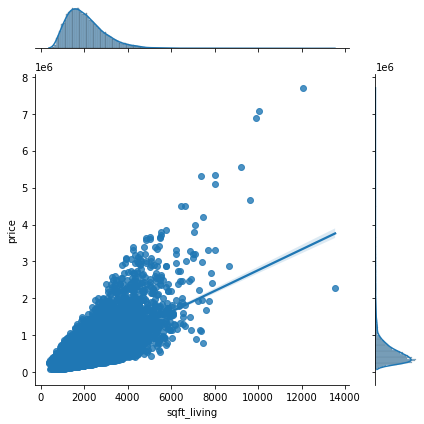

In [16]:
# examining the relationship between sqft_living and price
sns.jointplot('sqft_living','price', data=df, kind='reg')
plt.tight_layout()

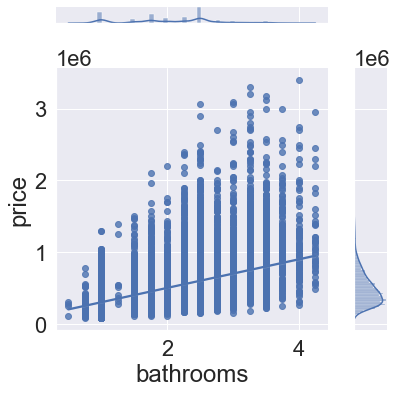

In [169]:
sns.jointplot('bathrooms','price', data=df, kind='reg')
plt.tight_layout()

## Data Preperation

Data Preparation Fundamentals - Applying appropriate preprocessing and feature engineering steps to tabular data in preparation for statistical modeling

Data Cleaning Steps
Handling Missing Values: Identify and address and missing values using techniques such as dropping or replacing data.

Handling Non-Numeric Data: A Linear regression model needs all of the features to be numeric, not categorical. Identify the data type 'object' and address them using techniques such as ordinal or one-hot encoding.

This notebook contains a breakdown of the step-by-step processes that we used to compile, scrub, and transform our data. It includes variations of narrowing our scope and explorations into the impacts that our different transformations have on the data.

### Preprocessing with Scikit-learn
Let explore and clean our data set to prep for our Linear Regression Model.
Preprocessing Steps.

1. Handle Missing Values
2. Convert Categorical Features into Numbers
3. Find and Remove Outliers

##### Handling Missing Values
Below, let's check to see if there are any NaNs in our data

In [17]:
#locate missing values
df.isna().sum()

id                0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront     2376
condition         0
grade             0
yr_built          0
dtype: int64

In [18]:
#dealing with missing values
for column in df.columns:
    percentage_of_nan = (sum(df[column].isnull())/len(df[column])) * 100 
    print(column, percentage_of_nan)

id 0.0
price 0.0
bedrooms 0.0
bathrooms 0.0
sqft_living 0.0
sqft_lot 0.0
floors 0.0
waterfront 11.00152798999861
condition 0.0
grade 0.0
yr_built 0.0


The feature 'waterfront' is the only feature with missing values and about 11% of the values have NaNs. Lets investigate this feature to handle it's missing values

In [19]:
df['waterfront'].value_counts()

NO     19075
YES      146
Name: waterfront, dtype: int64

We can see that the 'waterfront' feature only has two values, yes or no.
Thus NaN values can be considered no because they do not exist in their homes.

In [20]:
df['waterfront'].fillna('NO', inplace=True)

In [21]:
df['waterfront'].value_counts()

NO     21451
YES      146
Name: waterfront, dtype: int64

In [22]:
#recheck for missing values
df.isna().sum()

id             0
price          0
bedrooms       0
bathrooms      0
sqft_living    0
sqft_lot       0
floors         0
waterfront     0
condition      0
grade          0
yr_built       0
dtype: int64

##### Convert Categorical Features into Numbers


Our model would crash because some of the columns are non-numeric. Features with a numeric data type will work with our model, but these features need to be converted:
* waterfront (object)
* condition (object)
* grade (object)

Let's inspect the value counts of the specified features:

In [23]:
print(df['waterfront'].value_counts())
print()
print(df['condition'].value_counts())
print()
print(df['grade'].value_counts())

NO     21451
YES      146
Name: waterfront, dtype: int64

Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: condition, dtype: int64

7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64


##### split function to seperate the numeric value of 'grade'

The Grade feature is an object data type however the numeric grade is listed in the front. We will use a simple string split function to isolate the numeric part of the feature.

Waterfront has only 2 categories and can be converted into binary in place, whereas Condition has more than 2 categories and will need to be expanded into multiple columns.

In [24]:
df = df.assign(grade=df.grade.str.split(' ')).explode('grade')

In [25]:
df.duplicated().value_counts()

False    46360
True         6
dtype: int64

In [26]:
df = df.drop_duplicates()

In [27]:
df.shape

(46360, 11)

In [28]:
df = df.drop_duplicates(subset='id')

In [29]:
df.dropna()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
0,7129300520,221900.0,3,1.00,1180,5650,1.0,NO,Average,7,1955
1,6414100192,538000.0,3,2.25,2570,7242,2.0,NO,Average,7,1951
2,5631500400,180000.0,2,1.00,770,10000,1.0,NO,Average,6,1933
3,2487200875,604000.0,4,3.00,1960,5000,1.0,NO,Very Good,7,1965
4,1954400510,510000.0,3,2.00,1680,8080,1.0,NO,Average,8,1987
...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,360000.0,3,2.50,1530,1131,3.0,NO,Average,8,2009
21593,6600060120,400000.0,4,2.50,2310,5813,2.0,NO,Average,8,2014
21594,1523300141,402101.0,2,0.75,1020,1350,2.0,NO,Average,7,2009
21595,291310100,400000.0,3,2.50,1600,2388,2.0,NO,Average,8,2004


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21420 entries, 0 to 21596
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           21420 non-null  int64  
 1   price        21420 non-null  float64
 2   bedrooms     21420 non-null  int64  
 3   bathrooms    21420 non-null  float64
 4   sqft_living  21420 non-null  int64  
 5   sqft_lot     21420 non-null  int64  
 6   floors       21420 non-null  float64
 7   waterfront   21420 non-null  object 
 8   condition    21420 non-null  object 
 9   grade        21420 non-null  object 
 10  yr_built     21420 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 2.0+ MB


In [31]:
df['grade'].value_counts()

7     8889
8     6041
9     2606
6     1995
10    1130
11     396
5      234
12      88
4       27
13      13
3        1
Name: grade, dtype: int64

The most common buiding grade is a 7

In [32]:
# Change the data type from object to int.
df['grade'] = df['grade'].astype(int)

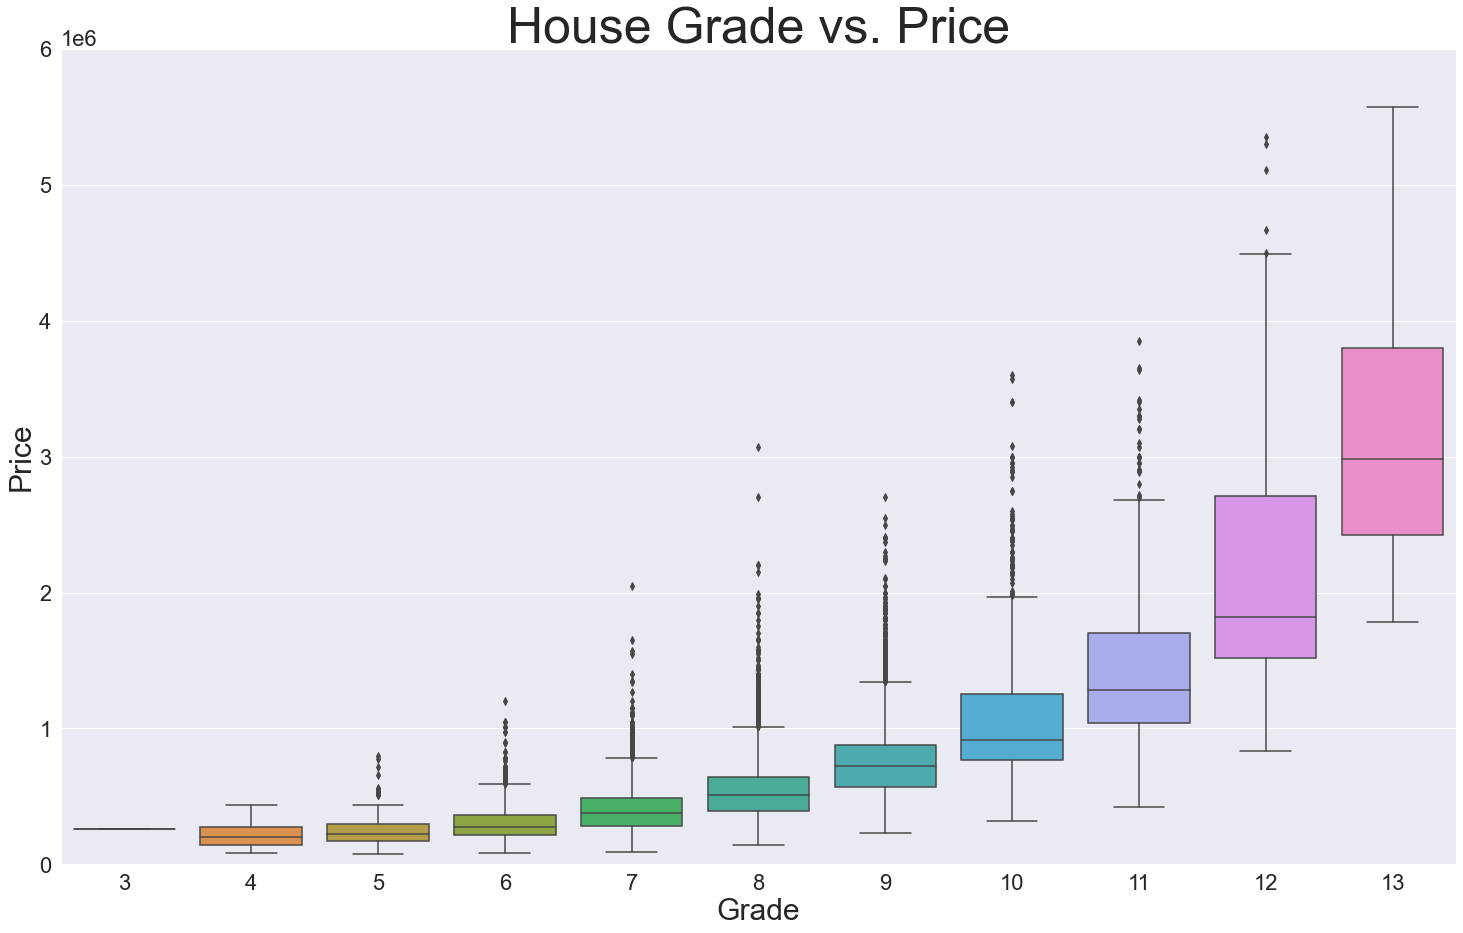

In [33]:
#grade
plt.figure(figsize=(25,15))
sns.set(font_scale=2)
ax = sns.boxplot(x="grade", y="price", data=df)
ax.set_title('House Grade vs. Price', fontsize=50)
ax.set_ylabel('Price', fontsize=30)
ax.set_xlabel('Grade', fontsize=30)
ax.set_ylim(bottom=0, top=6000000);

When we look at grade, we can see that as the categorical building grade designation improves, the house price does indeed rise as well. 

##### Binary Categories : OrdinalEncoder
For Binary categories, we will use an OrdinalEncoder to convert the category Waterfront into binary values by following these steps.

1. Identify data to be transformed
2. Instantiate the transformer object
3. Fit the transformer object
4. Transform data using the transformer object


In [34]:
# create a variable waterfront_train that contains the
# relevant column from df
waterfront_train = df[['waterfront']]

# Initiate an OrdinalEncoder
encoder_waterfront = OrdinalEncoder()

# Fit the encoder on waterfront_train
encoder_waterfront.fit(waterfront_train)

# Inspect the categories of the fitted encoder
encoder_waterfront.categories_[0]

array(['NO', 'YES'], dtype=object)

In [35]:
# Transform waterfront_train using the encoder and 
# assign the result to waterfront_encoded_train
waterfront_encoded_train = encoder_waterfront.transform(waterfront_train)

# Flatten for appropriate shape
waterfront_encoded_train = waterfront_encoded_train.flatten()

#Visually inspect waterfront_encoded_train
waterfront_encoded_train

array([0., 0., 0., ..., 0., 0., 0.])

In [36]:
# Replace value of Street
df['waterfront'] = waterfront_encoded_train

# Visually inspect df
df

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0.0,Average,7,1955
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,Average,7,1951
2,5631500400,180000.0,2,1.00,770,10000,1.0,0.0,Average,6,1933
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,Very Good,7,1965
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,Average,8,1987
...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,360000.0,3,2.50,1530,1131,3.0,0.0,Average,8,2009
21593,6600060120,400000.0,4,2.50,2310,5813,2.0,0.0,Average,8,2014
21594,1523300141,402101.0,2,0.75,1020,1350,2.0,0.0,Average,7,2009
21595,291310100,400000.0,3,2.50,1600,2388,2.0,0.0,Average,8,2004


In [37]:
df['waterfront'].value_counts()

0.0    21274
1.0      146
Name: waterfront, dtype: int64

##### Transforming the confition column using .map()

In [38]:
df['condition'].value_counts()

Average      13900
Good          5643
Very Good     1687
Fair           162
Poor            28
Name: condition, dtype: int64

In [39]:
condition_mapping = {
    "Average": 3,
    "Good": 4,
    "Very Good": 5,
    "Fair": 2,
    "Poor": 1
}

In [40]:
df['condition'].map(condition_mapping)

0        3
1        3
2        3
3        5
4        3
        ..
21592    3
21593    3
21594    3
21595    3
21596    3
Name: condition, Length: 21420, dtype: int64

In [41]:
df['condition'] = df['condition'].map(condition_mapping)
df['condition'].value_counts()

3    13900
4     5643
5     1687
2      162
1       28
Name: condition, dtype: int64

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21420 entries, 0 to 21596
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           21420 non-null  int64  
 1   price        21420 non-null  float64
 2   bedrooms     21420 non-null  int64  
 3   bathrooms    21420 non-null  float64
 4   sqft_living  21420 non-null  int64  
 5   sqft_lot     21420 non-null  int64  
 6   floors       21420 non-null  float64
 7   waterfront   21420 non-null  float64
 8   condition    21420 non-null  int64  
 9   grade        21420 non-null  int32  
 10  yr_built     21420 non-null  int64  
dtypes: float64(4), int32(1), int64(6)
memory usage: 2.4 MB


##### Dealing with Outliers

Its seems as the data set is containing both Single-Family and Multi-Family units. For example more than 8 bedrooms or more than 5 bathrooms. It would be better to separate the two different types of buildings and analyze. Thus we have decided to remove the rows with any outlier values.

In [43]:
# define function to describe outliers
def outliers_description(df):
    print('Outlier Data Description')
    describe = df.describe()

    describe.loc['+3_std'] = describe.loc['mean'] + (describe.loc['std'] * 3)
    describe.loc['-3_std'] = describe.loc['mean'] - (describe.loc['std'] * 3)
    print(describe)

In [44]:
outliers_description(df)

Outlier Data Description
                  id         price      bedrooms     bathrooms   sqft_living  \
count   2.142000e+04  2.142000e+04  21420.000000  21420.000000  21420.000000   
mean    4.580940e+09  5.407393e+05      3.373950      2.118429   2083.132633   
std     2.876761e+09  3.679311e+05      0.925405      0.768720    918.808412   
min     1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%     2.123537e+09  3.225000e+05      3.000000      1.750000   1430.000000   
50%     3.904921e+09  4.500000e+05      3.000000      2.250000   1920.000000   
75%     7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max     9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   
+3_std  1.321122e+10  1.644533e+06      6.150163      4.424589   4839.557868   
-3_std -4.049344e+09 -5.630540e+05      0.597736     -0.187731   -673.292602   

            sqft_lot        floors    waterfront     condition         grade  \
count   2.1420

##### Remove outliers more than 3 standard deviations away from the mean

In [45]:
def remove_outliers(df, features):
    print("Outliers Removed Count")
    
    x = len(df)
    
    for feature in features:
        df[feature + '_zscore'] = np.abs(stats.zscore(df[feature]))
        y = df.loc[np.abs(df[feature + '_zscore']) > 3]
        percent = round((len(y) * 100) / x, 3)
        
        print(len(y), "outliers removed for", feature)
        
        df = df.loc[np.abs(df[feature + '_zscore']) < 3]
        
        df = df.drop([feature + '_zscore'], axis=1)
    
    return df

In [46]:
outliers = df[['bedrooms', 'bathrooms', 'sqft_living']]
df = remove_outliers(df, outliers)

Outliers Removed Count
62 outliers removed for bedrooms
171 outliers removed for bathrooms
209 outliers removed for sqft_living


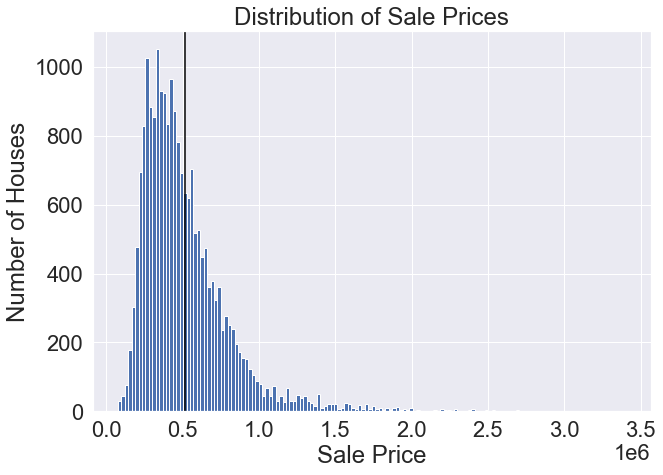

In [47]:
def plot_histogram(df, column, title, xlabel, ylabel):
    # Extract the relevant data
    data = df[column]
    mean = data.mean()
    # Set up plot
    fig, ax = plt.subplots(figsize=(10,7))
    # Plot histogram
    ax.hist(data, bins="auto")
    # Plot vertical line
    ax.axvline(mean, color="black")
    # Customize title and axes labels
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

plot_histogram(
    df,
    "price",
    "Distribution of Sale Prices",
    "Sale Price",
    "Number of Houses"
)

In [48]:
def print_stats(df, column):    
    print("Mean:              ", df[column].mean())
    print("Median:            ", df[column].median())
    print("Standard Deviation:", df[column].std())
    
print_stats(df, "price")

Mean:               518066.6351415769
Median:             447000.0
Standard Deviation: 301071.6722828131


Looks like a log normal distribution. Most houses in this sample are
clustered around the median value of 447,000 dollars, but the higher-end
homes are pulling the mean up to over 518,066 dollars

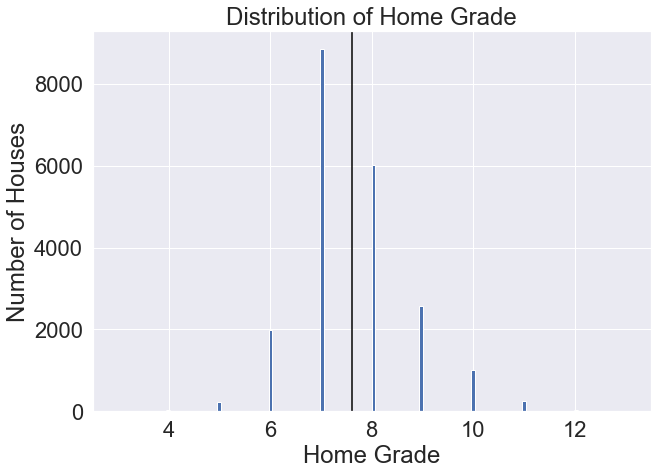

In [49]:
plot_histogram(
    df,
    "grade",
    "Distribution of Home Grade",
    "Home Grade",
    "Number of Houses"
)

In [50]:
print_stats(df, 'grade')

Mean:               7.610115358947469
Median:             7.0
Standard Deviation: 1.1050580688804281


Grade is approximately normally distributed.

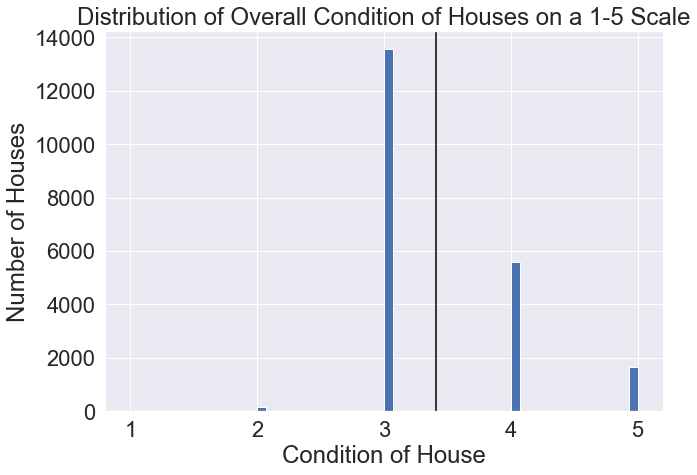

In [51]:
plot_histogram(
    df,
    "condition",
    "Distribution of Overall Condition of Houses on a 1-5 Scale",
    "Condition of House",
    "Number of Houses"
)

In [52]:
print_stats(df, 'condition')

Mean:               3.4131947754790732
Median:             3.0
Standard Deviation: 0.6509397347766206


Most homes have a condition of 3. It seems like we should treat this as a categorical rather than numeric variable, since the difference between conditions is so abrupt

Text(0.5, 1.0, 'Condition and Price')

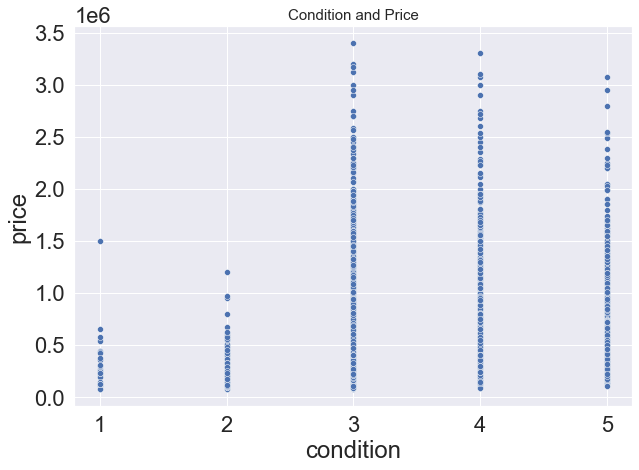

In [53]:
plt.figure(figsize=(10,7))
sns.scatterplot(df['condition'], df['price'])
plt.title('Condition and Price', fontsize=15)

The condition variable in the dataset that we would expect to be highly related with price, but which doesn't have a clear linear relationship.

One useful way to explore a categorical variable is to create subsets of the full dataset based on that categorical variable, then plot their distributions based on some other variable.

In [54]:
below_average_condition = df[df["condition"] < 3]
average_condition = df[df["condition"] == 3]
above_average_condition = df[df["condition"] > 3]

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20978 entries, 0 to 21596
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           20978 non-null  int64  
 1   price        20978 non-null  float64
 2   bedrooms     20978 non-null  int64  
 3   bathrooms    20978 non-null  float64
 4   sqft_living  20978 non-null  int64  
 5   sqft_lot     20978 non-null  int64  
 6   floors       20978 non-null  float64
 7   waterfront   20978 non-null  float64
 8   condition    20978 non-null  int64  
 9   grade        20978 non-null  int32  
 10  yr_built     20978 non-null  int64  
dtypes: float64(4), int32(1), int64(6)
memory usage: 1.8 MB


In [56]:
# Change the data type from object to int.
df['price'] = df['price'].astype(int)

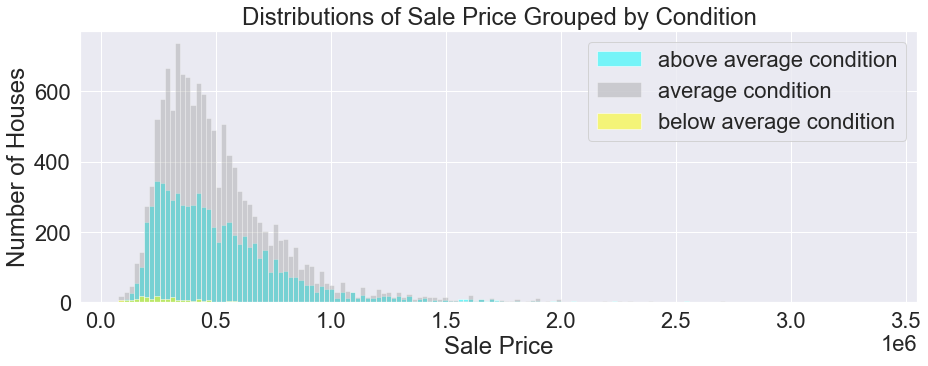

In [57]:
# Set up plot
fig, ax = plt.subplots(figsize=(15,5))

# Create custom bins so all are on the same scale
bins = range(df["price"].min(), df["price"].max(), int(df["price"].median()) // 20)

# Plot three histograms, with reduced opacity (alpha) so we
# can see them overlapping
ax.hist(
    x=above_average_condition["price"],
    label="above average condition",
    bins=bins,
    color="cyan",
    alpha=0.5
)
ax.hist(
    x=average_condition["price"],
    label="average condition",
    bins=bins,
    color="gray",
    alpha=0.3
)
ax.hist(
    x=below_average_condition["price"],
    label="below average condition",
    bins=bins,
    color="yellow",
    alpha=0.5
)

# Customize labels
ax.set_title("Distributions of Sale Price Grouped by Condition")
ax.set_xlabel("Sale Price")
ax.set_ylabel("Number of Houses")
ax.legend();

But what might be surprising is that above-average condition houses
do not seem to have higher average sale prices than average condition
houses. We might want to investigate further to understand what
kinds of houses are rated as above-average condition, since this goes
against a standard assumption that better condition would mean higher
cost.

### Assumptions

Now that we have finished cleaning the data set let's begin to make our initial assumptions. We'll test the normality of distribution for several independent variables as well as their linearity to the Price. If the variable appears to be normally distributed and linear we will use that in our initial model.

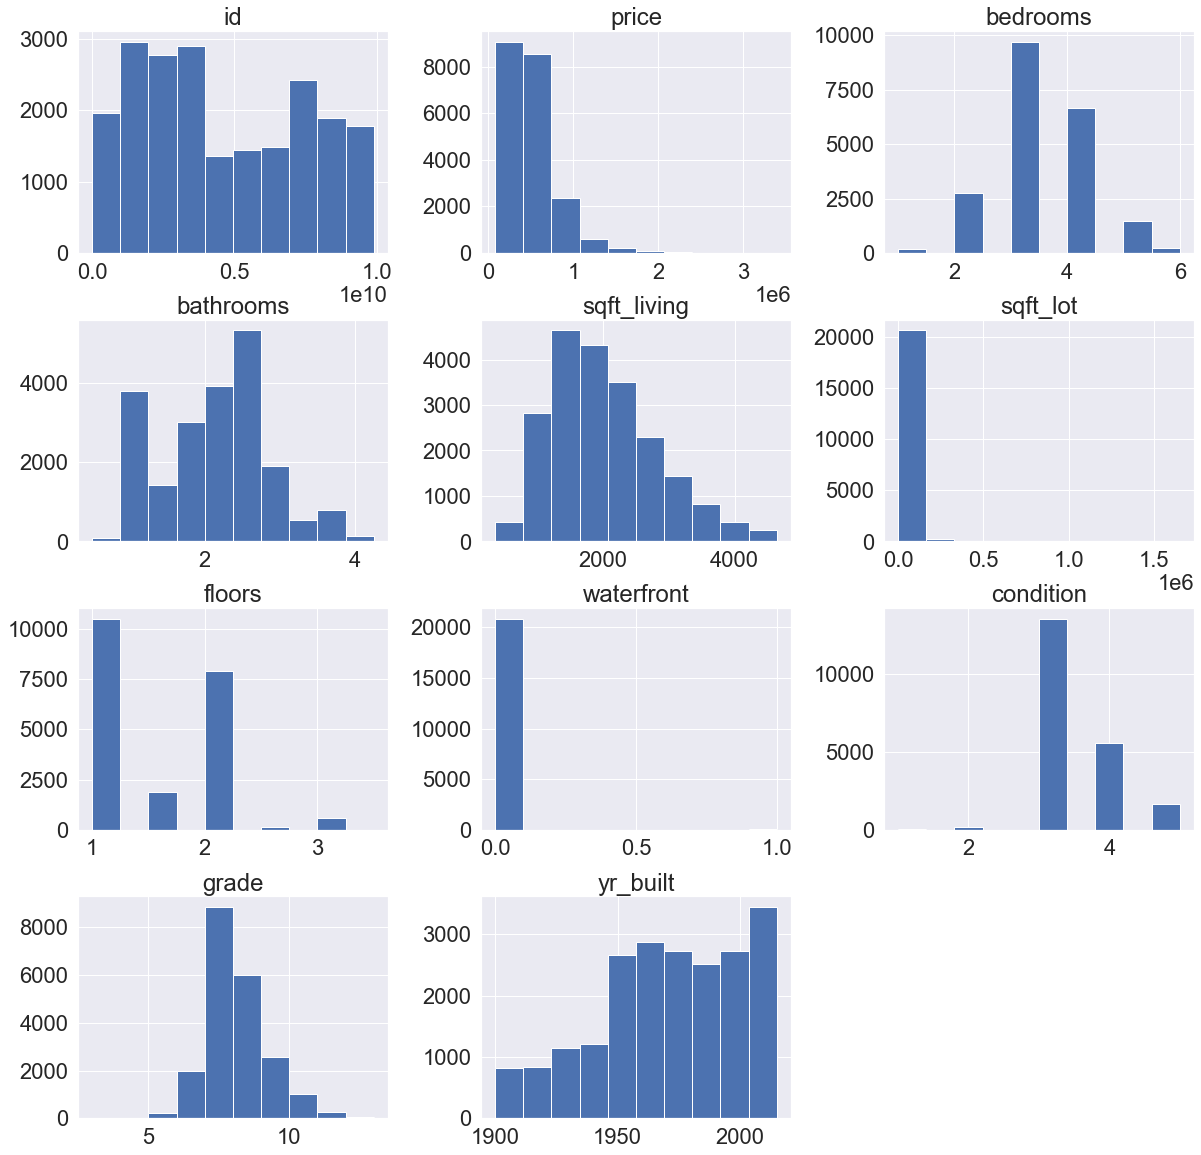

In [58]:
#review distribution of variables
df.hist(figsize=(20,20));

##### Reviewing Correlations and Addressing Multicollinearity

The objective is finding out which variables are most strongly correlated with price, as these variables will be good candidates for inclusion in our model. One of the assumptions of a multiple linear regression model, however, is that there is no multicollinearity among the explanatory variables. Below, we create a correlation matrix of price and continuous variables in the dataset to visualize correlations.

##### Explore Correlations

To understand more about what features of these homes lead to higher sale prices, let's look at some correlations.

In [59]:
# Get a list of correlations with SalePrice, sorted from smallest
# to largest
correlation_series = df.corr()['price'].sort_values()
# Select second to last correlation, since the highest (last)
# correlation will be SalePrice correlating 100% with itself
max_corr_value = correlation_series.iloc[-2]
max_corr_column = correlation_series.index[-2]
print("Most Positively Correlated Column:", max_corr_column)
print("Maximum Correlation Value:", max_corr_value)

Most Positively Correlated Column: grade
Maximum Correlation Value: 0.6515434324583883


In [60]:
correlation_series = df.corr()['price'].sort_values()
max_corr_value = correlation_series.iloc[-3]
max_corr_column = correlation_series.index[-3]
print("Second Most Positively Correlated Column:", max_corr_column)
print("Maximum Correlation Value:", max_corr_value)

Second Most Positively Correlated Column: sqft_living
Maximum Correlation Value: 0.6472777070874484


In [61]:
correlation_series = df.corr()['price'].sort_values()
max_corr_value = correlation_series.iloc[-4]
max_corr_column = correlation_series.index[-4]
print("Third Most Positively Correlated Column:", max_corr_column)
print("Maximum Correlation Value:", max_corr_value)

Third Most Positively Correlated Column: bathrooms
Maximum Correlation Value: 0.4696317325722415


##### Q1: What features have the highest correlation to the home price?

The houses grade, sqft_living, and bathrooms have the highest correlation with price.

In [62]:
# We can just find the smallest value, not the second smallest,
# since we aren't avoiding the perfect correlation with itself
min_corr_value = correlation_series.iloc[1]
min_corr_column = correlation_series.index[1]

print("Most Negatively Correlated Column:", min_corr_column)
print("Minimum Correlation Value:", min_corr_value)

Most Negatively Correlated Column: yr_built
Minimum Correlation Value: 0.03304060821765139


In [63]:
min_corr_value = correlation_series.iloc[2]
min_corr_column = correlation_series.index[2]

print("Second Most Negatively Correlated Column:", min_corr_column)
print("Minimum Correlation Value:", min_corr_value)

Second Most Negatively Correlated Column: condition
Minimum Correlation Value: 0.05131668178239331


<AxesSubplot:>

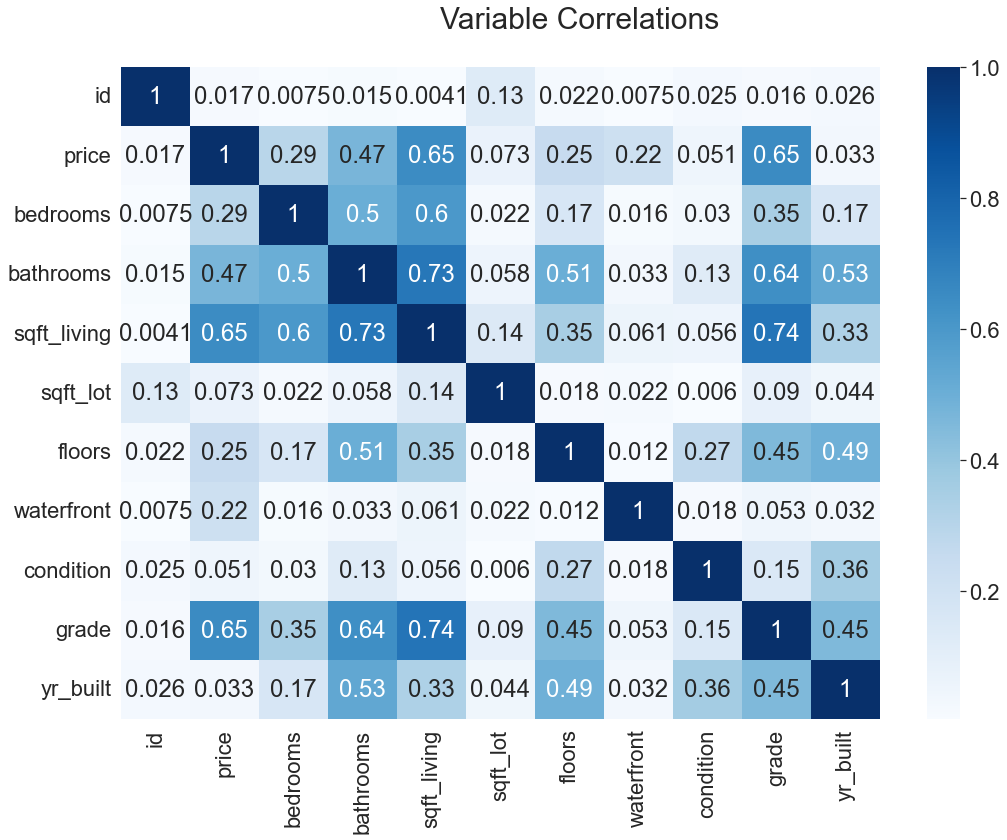

In [64]:
corr = df.corr().abs()
fig, ax=plt.subplots(figsize=(17,12))
fig.suptitle('Variable Correlations', fontsize=30, y=.95,)
heatmap = sns.heatmap(corr, cmap='Blues', annot=True)
heatmap

In [65]:
# create and display dataframes that narrow down the most pronounced correlations
features = []
correlations = []
for idx, correlation in corr['price'].T.iteritems():
    if correlation >= .30 and idx != 'price':
        features.append(idx)
        correlations.append(correlation)
corr_price_df = pd.DataFrame({'Correlations':correlations, 
                              'Features': features}).sort_values(by=['Correlations'], 
                                                                 ascending=False)

In [66]:
Multicollinear_Features = []
Multicollinear_Corr = []
def check_multicollinearity(feature):
    for idx, correlation in corr[feature].T.iteritems():
        if correlation >= .70 and idx != feature:
            Multicollinear_Features.append([feature, idx])
            Multicollinear_Corr.append(correlation)
            
for feature in corr:
    check_multicollinearity(feature)
MC_df = pd.DataFrame({'Correlations':Multicollinear_Corr, 
                      'Features': Multicollinear_Features}).sort_values(by=['Correlations'],
                                                                        ascending=False)

In [67]:
print('Correlations with Price')
display(corr_price_df)
print('Multicollinear Features')
display(MC_df)

Correlations with Price


,Correlations,Features
2,0.651543,grade
1,0.647278,sqft_living
0,0.469632,bathrooms


Multicollinear Features


,Correlations,Features
2,0.737053,"[sqft_living, grade]"
3,0.737053,"[grade, sqft_living]"
0,0.725613,"[bathrooms, sqft_living]"
1,0.725613,"[sqft_living, bathrooms]"


##### Q2: What features have the strongest correlations with other predicting variables?

None of our features have a correlation over 0.75 so multicollinearity is not an issue.
Sqft_livng and grade have the highest correlations in our data.

In [68]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
id,1.000000,-0.017185,0.007509,0.015375,-0.004123,-0.131456,0.022023,-0.007457,-0.025194,0.016228,0.025617
price,-0.017185,1.000000,0.294247,0.469632,0.647278,0.072836,0.251965,0.216155,0.051317,0.651543,0.033041
bedrooms,0.007509,0.294247,1.000000,0.502386,0.598196,0.022481,0.166861,-0.015706,0.029669,0.349646,0.165938
bathrooms,0.015375,0.469632,0.502386,1.000000,0.725613,0.058334,0.505936,0.033232,-0.128354,0.637203,0.529347
sqft_living,-0.004123,0.647278,0.598196,0.725613,1.000000,0.143944,0.346984,0.060978,-0.056413,0.737053,0.330360
sqft_lot,-0.131456,0.072836,0.022481,0.058334,0.143944,1.000000,-0.017644,0.022358,-0.005974,0.089541,0.043590
floors,0.022023,0.251965,0.166861,0.505936,0.346984,-0.017644,1.000000,0.011859,-0.268988,0.453326,0.492854
waterfront,-0.007457,0.216155,-0.015706,0.033232,0.060978,0.022358,0.011859,1.000000,0.018361,0.053071,-0.032005
condition,-0.025194,0.051317,0.029669,-0.128354,-0.056413,-0.005974,-0.268988,0.018361,1.000000,-0.151066,-0.361670
grade,0.016228,0.651543,0.349646,0.637203,0.737053,0.089541,0.453326,0.053071,-0.151066,1.000000,0.452886


## Data Modeling

There are 3 assumptions about the data that must be checked before building any linear regression model:

There should be a linear relationship between the explanatory and response variable.
The data should be homoscedastic (i.e., the residuals have equal variance around the regression line on a scatterplot).
The model residuals should follow a normal distribution (i.e. the residuals fall along a relatively straight line on a QQ plot).
All of the above assumptions, in addition to the assumption of no multicollinearity, also apply to multiple regression.

In addition to checking for these assumptions, we will also look at two values in the model summary:

R-squared: This value tells us what proportion of the variability of y around its mean can be explained by the model. It can fall between 0 and 1, and a higher r-squared value indicates higher predictive power.

p-value: The null hypothesis for linear regression is that there is no relationship between the chosen explanatory variables and the response variable. Therefore, we want the model to have a p-value lower than .05 so we can reject the null hypothesis.

### Model #1: Baseline Model
##### Build a baseline model using the top two features correlated to price

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20978 entries, 0 to 21596
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           20978 non-null  int64  
 1   price        20978 non-null  int32  
 2   bedrooms     20978 non-null  int64  
 3   bathrooms    20978 non-null  float64
 4   sqft_living  20978 non-null  int64  
 5   sqft_lot     20978 non-null  int64  
 6   floors       20978 non-null  float64
 7   waterfront   20978 non-null  float64
 8   condition    20978 non-null  int64  
 9   grade        20978 non-null  int32  
 10  yr_built     20978 non-null  int64  
dtypes: float64(3), int32(2), int64(6)
memory usage: 1.8 MB


In [70]:
home_preds0 = df.drop(['price', 
                       'id', 
                       'bathrooms', 
                       'bedrooms', 
                       'waterfront',
                       'sqft_lot', 
                       'floors',  
                       'condition', 
                       'yr_built'], axis=1)
home_target0 = df['price']
home_preds0.head()

,sqft_living,grade
0,1180,7
1,2570,7
2,770,6
3,1960,7
4,1680,8


In [71]:
predictors0 = sm.add_constant(home_preds0)
predictors0

,const,sqft_living,grade
0,1.0,1180,7
1,1.0,2570,7
2,1.0,770,6
3,1.0,1960,7
4,1.0,1680,8
...,...,...,...
21592,1.0,1530,8
21593,1.0,2310,8
21594,1.0,1020,7
21595,1.0,1600,8


In [72]:
modelbaseline = sm.OLS(home_target0, predictors0).fit()

In [73]:
modelbaseline.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.486
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     9901.
Date:                Fri, 27 May 2022   Prob (F-statistic):               0.00
Time:                        15:14:34   Log-Likelihood:            -2.8743e+05
No. Observations:               20978   AIC:                         5.749e+05
Df Residuals:                   20975   BIC:                         5.749e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -5.521e+05   1.18e+04    -46.786      0.000   -5.75e+05   -5.29e+05
sqft_living   137.6391      2.758     49.914      0.000     132.234     143.044
grade        1.041e+05   1996.367     52.128      0.000       1e+05    1.08e+05
==============================================================================
Omnibus:                    10657.564   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           129013.168
Skew:                           2.160   Prob(JB):                         0.00
Kurtosis:                      14.355   Cond. No.                     1.74e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.74e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### the baseline model's R Squared value is 0.486, lets try to increase the accuracy.

### Model #2: using train_test_split

In [74]:
y = df['price']
X = df.drop('price', axis=1)

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [76]:
print(f"X_train is a DataFrame with {X_train.shape[0]} rows and {X_train.shape[1]} columns")
print(f"y_train is a Series with {y_train.shape[0]} values")

# We always should have the same number of rows in X as values in y
assert X_train.shape[0] == y_train.shape[0]

X_train is a DataFrame with 15733 rows and 10 columns
y_train is a Series with 15733 values


In [77]:
# Declare relevant columns
relevant_columns = [
    'bedrooms',
    'bathrooms',
    'sqft_living',
    'sqft_lot',
    'waterfront',
    'floors',
    'condition',
    'grade',
    'yr_built'
]

# Reassign X_train so that it only contains relevant columns
X_train = X_train.loc[:, relevant_columns]

# Visually inspect X_train
X_train

,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,floors,condition,grade,yr_built
4438,4,2.50,2770,6000,0.0,2.0,3,8,1993
15353,4,1.50,2480,6383,0.0,1.0,3,7,1946
6845,4,2.50,2320,7800,0.0,2.0,3,8,1986
18197,3,1.50,1930,11092,0.0,1.0,3,7,1983
2198,4,3.75,4490,34982,0.0,2.0,3,12,1998
...,...,...,...,...,...,...,...,...,...
11604,4,2.75,2640,35070,0.0,1.5,3,8,1963
12305,2,1.50,1140,1149,0.0,2.0,3,7,2001
5551,2,2.00,1060,4000,0.0,1.0,2,7,1914
889,3,2.50,3000,25341,0.0,2.0,3,9,1995


There might be a clearer linear relationship between price and specific condition values, which we can explore more effectively by one-hot encoding the variable.

##### Multiple Categories
Unlike the 'waterfront' feature, 'condition' has more than two categories. We will need to create multiple columns that are each representing one category. To do this we will use
##### OneHotEncoder from sklearn.preprocessing

In [78]:
# Create a variable condition_train
# extrated from X_train
condition_train = X_train[['condition']]

# Instantiate a OneHotEncoder
ohe = OneHotEncoder(categories='auto', sparse=False, handle_unknown='ignore')

# Fit the encoder on condition_train
ohe.fit(condition_train)

# Inspect the categories of the fitted encoder
ohe.categories_

[array([1, 2, 3, 4, 5], dtype=int64)]

In [79]:
# Transform condition_train using the encoder and
# assign the result to condition_encoded_train
condition_encoded_train = ohe.transform(condition_train)

condition_encoded_train

array([[0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [80]:
# Make the transformed data into a datafram
condition_encoded_train = pd.DataFrame(
    condition_encoded_train,
    columns=ohe.categories_[0],
    index=X_train.index
)

condition_encoded_train

,1,2,3,4,5
4438,0.0,0.0,1.0,0.0,0.0
15353,0.0,0.0,1.0,0.0,0.0
6845,0.0,0.0,1.0,0.0,0.0
18197,0.0,0.0,1.0,0.0,0.0
2198,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...
11604,0.0,0.0,1.0,0.0,0.0
12305,0.0,0.0,1.0,0.0,0.0
5551,0.0,1.0,0.0,0.0,0.0
889,0.0,0.0,1.0,0.0,0.0


In [81]:
# Drop original condition column
X_train.drop('condition', axis=1, inplace=True)
X_train

,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,floors,grade,yr_built
4438,4,2.50,2770,6000,0.0,2.0,8,1993
15353,4,1.50,2480,6383,0.0,1.0,7,1946
6845,4,2.50,2320,7800,0.0,2.0,8,1986
18197,3,1.50,1930,11092,0.0,1.0,7,1983
2198,4,3.75,4490,34982,0.0,2.0,12,1998
...,...,...,...,...,...,...,...,...
11604,4,2.75,2640,35070,0.0,1.5,8,1963
12305,2,1.50,1140,1149,0.0,2.0,7,2001
5551,2,2.00,1060,4000,0.0,1.0,7,1914
889,3,2.50,3000,25341,0.0,2.0,9,1995


In [82]:
# Concatenate the new dataframe with current df
X_train = pd.concat([X_train, condition_encoded_train], axis=1)
X_train

,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,floors,grade,yr_built,1,2,3,4,5
4438,4,2.50,2770,6000,0.0,2.0,8,1993,0.0,0.0,1.0,0.0,0.0
15353,4,1.50,2480,6383,0.0,1.0,7,1946,0.0,0.0,1.0,0.0,0.0
6845,4,2.50,2320,7800,0.0,2.0,8,1986,0.0,0.0,1.0,0.0,0.0
18197,3,1.50,1930,11092,0.0,1.0,7,1983,0.0,0.0,1.0,0.0,0.0
2198,4,3.75,4490,34982,0.0,2.0,12,1998,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11604,4,2.75,2640,35070,0.0,1.5,8,1963,0.0,0.0,1.0,0.0,0.0
12305,2,1.50,1140,1149,0.0,2.0,7,2001,0.0,0.0,1.0,0.0,0.0
5551,2,2.00,1060,4000,0.0,1.0,7,1914,0.0,1.0,0.0,0.0,0.0
889,3,2.50,3000,25341,0.0,2.0,9,1995,0.0,0.0,1.0,0.0,0.0


In [83]:
# dropping a column related to condition to avoid the dummy variable trap
X_train.drop(1, axis=1, inplace=True)
X_train

,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,floors,grade,yr_built,2,3,4,5
4438,4,2.50,2770,6000,0.0,2.0,8,1993,0.0,1.0,0.0,0.0
15353,4,1.50,2480,6383,0.0,1.0,7,1946,0.0,1.0,0.0,0.0
6845,4,2.50,2320,7800,0.0,2.0,8,1986,0.0,1.0,0.0,0.0
18197,3,1.50,1930,11092,0.0,1.0,7,1983,0.0,1.0,0.0,0.0
2198,4,3.75,4490,34982,0.0,2.0,12,1998,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
11604,4,2.75,2640,35070,0.0,1.5,8,1963,0.0,1.0,0.0,0.0
12305,2,1.50,1140,1149,0.0,2.0,7,2001,0.0,1.0,0.0,0.0
5551,2,2.00,1060,4000,0.0,1.0,7,1914,1.0,0.0,0.0,0.0
889,3,2.50,3000,25341,0.0,2.0,9,1995,0.0,1.0,0.0,0.0


In [84]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15733 entries, 4438 to 16247
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   bedrooms     15733 non-null  int64  
 1   bathrooms    15733 non-null  float64
 2   sqft_living  15733 non-null  int64  
 3   sqft_lot     15733 non-null  int64  
 4   waterfront   15733 non-null  float64
 5   floors       15733 non-null  float64
 6   grade        15733 non-null  int32  
 7   yr_built     15733 non-null  int64  
 8   2            15733 non-null  float64
 9   3            15733 non-null  float64
 10  4            15733 non-null  float64
 11  5            15733 non-null  float64
dtypes: float64(7), int32(1), int64(4)
memory usage: 1.5 MB


In [85]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [86]:
# use cross validation to take a look at the model's performance:
cross_val_score(model, X_train, y_train, cv=3)

array([0.61210062, 0.60849282, 0.59087099])

##### Preprocess for Test Data
Apply same steps on Test Data

In [87]:
# Preprocess Test Data
X_test = X_test.loc[:, relevant_columns]

In [88]:
X_test

,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,floors,condition,grade,yr_built
2597,2,1.00,900,7620,0.0,1.0,3,7,1971
4481,4,2.50,2020,7277,0.0,2.0,3,8,1993
7616,3,1.75,1300,7735,0.0,1.0,4,7,1980
8953,4,2.25,3190,11597,0.0,2.0,3,10,1984
5575,4,1.75,1780,9794,0.0,1.0,3,7,1967
...,...,...,...,...,...,...,...,...,...
3088,2,2.00,1780,3810,0.0,1.5,3,7,1922
8182,5,2.50,1970,8605,0.0,2.0,4,7,1994
18357,2,1.75,950,15219,0.0,1.0,3,8,2009
1319,3,1.50,1380,6657,0.0,2.0,3,7,1986


In [89]:
# One-hot encode condition
condition_test = X_test[["condition"]]
condition_encoded_test = ohe.transform(condition_test)
condition_encoded_test = pd.DataFrame(
    condition_encoded_test,
    columns=ohe.categories_[0],
    index=X_test.index
)
X_test.drop("condition", axis=1, inplace=True)
X_test = pd.concat([X_test, condition_encoded_test], axis=1)

# Visually inspect X_test
X_test

,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,floors,grade,yr_built,1,2,3,4,5
2597,2,1.00,900,7620,0.0,1.0,7,1971,0.0,0.0,1.0,0.0,0.0
4481,4,2.50,2020,7277,0.0,2.0,8,1993,0.0,0.0,1.0,0.0,0.0
7616,3,1.75,1300,7735,0.0,1.0,7,1980,0.0,0.0,0.0,1.0,0.0
8953,4,2.25,3190,11597,0.0,2.0,10,1984,0.0,0.0,1.0,0.0,0.0
5575,4,1.75,1780,9794,0.0,1.0,7,1967,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3088,2,2.00,1780,3810,0.0,1.5,7,1922,0.0,0.0,1.0,0.0,0.0
8182,5,2.50,1970,8605,0.0,2.0,7,1994,0.0,0.0,0.0,1.0,0.0
18357,2,1.75,950,15219,0.0,1.0,8,2009,0.0,0.0,1.0,0.0,0.0
1319,3,1.50,1380,6657,0.0,2.0,7,1986,0.0,0.0,1.0,0.0,0.0


In [90]:
X_test.drop(1, axis=1, inplace=True)
X_test

,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,floors,grade,yr_built,2,3,4,5
2597,2,1.00,900,7620,0.0,1.0,7,1971,0.0,1.0,0.0,0.0
4481,4,2.50,2020,7277,0.0,2.0,8,1993,0.0,1.0,0.0,0.0
7616,3,1.75,1300,7735,0.0,1.0,7,1980,0.0,0.0,1.0,0.0
8953,4,2.25,3190,11597,0.0,2.0,10,1984,0.0,1.0,0.0,0.0
5575,4,1.75,1780,9794,0.0,1.0,7,1967,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3088,2,2.00,1780,3810,0.0,1.5,7,1922,0.0,1.0,0.0,0.0
8182,5,2.50,1970,8605,0.0,2.0,7,1994,0.0,0.0,1.0,0.0
18357,2,1.75,950,15219,0.0,1.0,8,2009,0.0,1.0,0.0,0.0
1319,3,1.50,1380,6657,0.0,2.0,7,1986,0.0,1.0,0.0,0.0


In [91]:
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.6172888187559109

In [92]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15733 entries, 4438 to 16247
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   bedrooms     15733 non-null  int64  
 1   bathrooms    15733 non-null  float64
 2   sqft_living  15733 non-null  int64  
 3   sqft_lot     15733 non-null  int64  
 4   waterfront   15733 non-null  float64
 5   floors       15733 non-null  float64
 6   grade        15733 non-null  int32  
 7   yr_built     15733 non-null  int64  
 8   2            15733 non-null  float64
 9   3            15733 non-null  float64
 10  4            15733 non-null  float64
 11  5            15733 non-null  float64
dtypes: float64(7), int32(1), int64(4)
memory usage: 1.5 MB


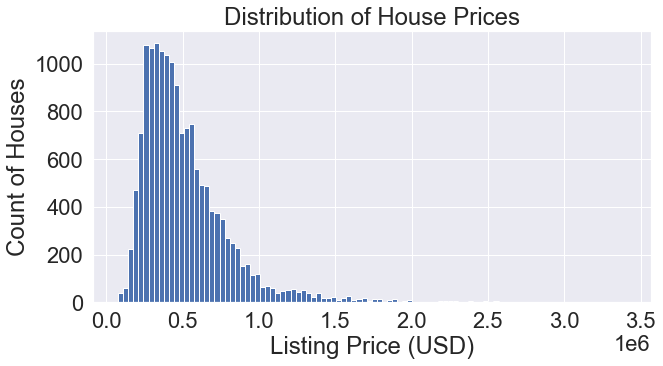

In [93]:
# A visualization of the distribution of the target variable:
fig, ax = plt.subplots(figsize=(10, 5))

ax.hist(y_train, bins=100)

ax.set_xlabel("Listing Price (USD)")
ax.set_ylabel("Count of Houses")
ax.set_title("Distribution of House Prices");

##### Interpret a Correlation Heatmap

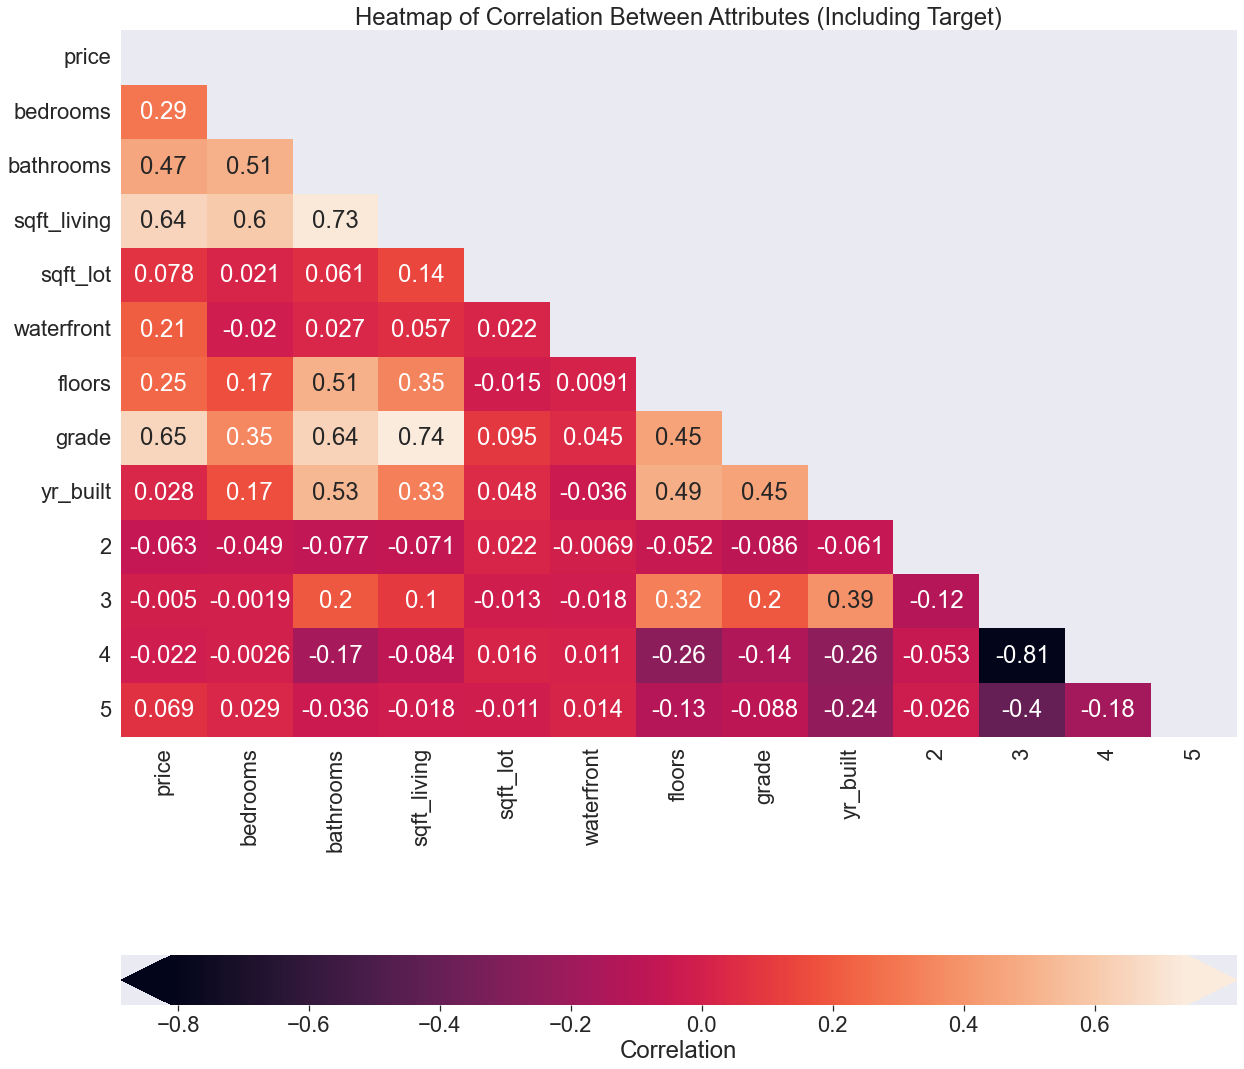

In [94]:
heatmap_data = pd.concat([y_train, X_train], axis=1)
corr = heatmap_data.corr()

# Set up figure and axes
fig, ax = plt.subplots(figsize=(20, 20))

sns.heatmap(
    data=corr,
    mask=np.triu(np.ones_like(corr, dtype=bool)),
    ax=ax,
    annot=True,
    cbar_kws={"label": "Correlation", "orientation": "horizontal", "pad": .2, "extend": "both"}
)

ax.set_title("Heatmap of Correlation Between Attributes (Including Target)");

In [95]:
most_correlated_feature = 'grade'

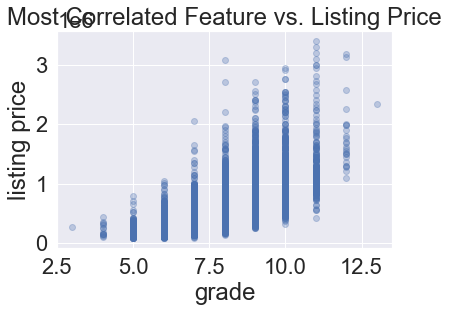

In [96]:
fig, ax = plt.subplots()

ax.scatter(X_train[most_correlated_feature], y_train, alpha=0.3)
ax.set_xlabel(most_correlated_feature)
ax.set_ylabel("listing price")
ax.set_title("Most Correlated Feature vs. Listing Price");

In [97]:
baseline_model = LinearRegression()

In [98]:
from sklearn.model_selection import cross_validate, ShuffleSplit

splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=0)

baseline_scores = cross_validate(
    estimator=baseline_model,
    X=X_train[[most_correlated_feature]],
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Train score:      0.4219222881153983
Validation score: 0.41992301320322056


In [99]:
w = X_train
k = y_train

In [100]:
X_intw = sm.add_constant(w)
X_intw

,const,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,floors,grade,yr_built,2,3,4,5
4438,1.0,4,2.50,2770,6000,0.0,2.0,8,1993,0.0,1.0,0.0,0.0
15353,1.0,4,1.50,2480,6383,0.0,1.0,7,1946,0.0,1.0,0.0,0.0
6845,1.0,4,2.50,2320,7800,0.0,2.0,8,1986,0.0,1.0,0.0,0.0
18197,1.0,3,1.50,1930,11092,0.0,1.0,7,1983,0.0,1.0,0.0,0.0
2198,1.0,4,3.75,4490,34982,0.0,2.0,12,1998,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11604,1.0,4,2.75,2640,35070,0.0,1.5,8,1963,0.0,1.0,0.0,0.0
12305,1.0,2,1.50,1140,1149,0.0,2.0,7,2001,0.0,1.0,0.0,0.0
5551,1.0,2,2.00,1060,4000,0.0,1.0,7,1914,1.0,0.0,0.0,0.0
889,1.0,3,2.50,3000,25341,0.0,2.0,9,1995,0.0,1.0,0.0,0.0


In [101]:
model1 = sm.OLS(k,X_intw).fit()

In [102]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.605
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     2010.
Date:                Fri, 27 May 2022   Prob (F-statistic):               0.00
Time:                        15:14:57   Log-Likelihood:            -2.1360e+05
No. Observations:               15733   AIC:                         4.272e+05
Df Residuals:                   15720   BIC:                         4.273e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        6.248e+06   1.36e+05     45.958      0.000    5.98e+06    6.51e+06
bedrooms    -3.418e+04   2300.737    -14.854      0.000   -3.87e+04   -2.97e+04
bathrooms    4.541e+04   3685.584     12.320      0.000    3.82e+04    5.26e+04
sqft_living   134.6878      3.685     36.554      0.000     127.465     141.910
sqft_lot       -0.0739      0.038     -1.963      0.050      -0.148      -0.000
waterfront   6.071e+05   1.99e+04     30.437      0.000    5.68e+05    6.46e+05
floors       2.776e+04   3554.094      7.809      0.000    2.08e+04    3.47e+04
grade        1.343e+05   2254.597     59.571      0.000     1.3e+05    1.39e+05
yr_built    -3604.5959     68.996    -52.243      0.000   -3739.837   -3469.355
2            2.458e+04   4.41e+04      0.557      0.577   -6.19e+04    1.11e+05
3            4.773e+04   4.09e+04      1.168      0.243   -3.23e+04    1.28e+05
4            6.359e+04   4.09e+04      1.556      0.120   -1.65e+04    1.44e+05
5            1.004e+05   4.11e+04      2.442      0.015    1.98e+04    1.81e+05
==============================================================================
Omnibus:                     7150.736   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            86958.778
Skew:                           1.863   Prob(JB):                         0.00
Kurtosis:                      13.898   Cond. No.                     3.98e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.98e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### the R Squared value increased to 0.605

### Model #3: Dropping multicollinear features

In [103]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15733 entries, 4438 to 16247
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   bedrooms     15733 non-null  int64  
 1   bathrooms    15733 non-null  float64
 2   sqft_living  15733 non-null  int64  
 3   sqft_lot     15733 non-null  int64  
 4   waterfront   15733 non-null  float64
 5   floors       15733 non-null  float64
 6   grade        15733 non-null  int32  
 7   yr_built     15733 non-null  int64  
 8   2            15733 non-null  float64
 9   3            15733 non-null  float64
 10  4            15733 non-null  float64
 11  5            15733 non-null  float64
dtypes: float64(7), int32(1), int64(4)
memory usage: 1.5 MB


IndexError: index 3 is out of bounds for axis 0 with size 3

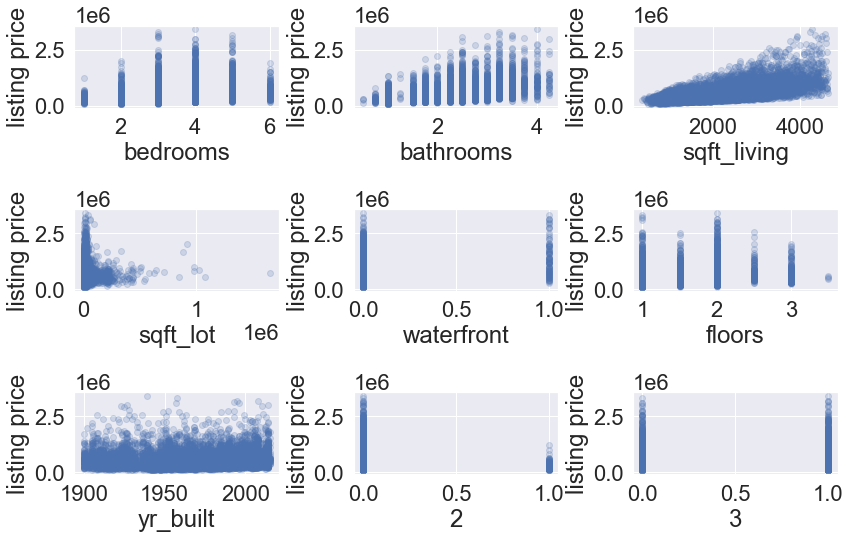

In [104]:
scatterplot_data = X_train.drop("grade", axis=1)

fig, axes = plt.subplots(ncols=3, nrows=3, figsize=(12, 8))
fig.set_tight_layout(True)

for index, col in enumerate(scatterplot_data.columns):
    ax = axes[index//3][index%3]
    ax.scatter(X_train[col], y_train, alpha=0.2)
    ax.set_xlabel(col)
    ax.set_ylabel("listing price")

In [105]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15733 entries, 4438 to 16247
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   bedrooms     15733 non-null  int64  
 1   bathrooms    15733 non-null  float64
 2   sqft_living  15733 non-null  int64  
 3   sqft_lot     15733 non-null  int64  
 4   waterfront   15733 non-null  float64
 5   floors       15733 non-null  float64
 6   grade        15733 non-null  int32  
 7   yr_built     15733 non-null  int64  
 8   2            15733 non-null  float64
 9   3            15733 non-null  float64
 10  4            15733 non-null  float64
 11  5            15733 non-null  float64
dtypes: float64(7), int32(1), int64(4)
memory usage: 1.5 MB


In [106]:
X_train_second_model = X_train.drop(['sqft_living',  
                                     'yr_built', 2, 3, 4, 5], axis=1).copy()
X_train_second_model

,bedrooms,bathrooms,sqft_lot,waterfront,floors,grade
4438,4,2.50,6000,0.0,2.0,8
15353,4,1.50,6383,0.0,1.0,7
6845,4,2.50,7800,0.0,2.0,8
18197,3,1.50,11092,0.0,1.0,7
2198,4,3.75,34982,0.0,2.0,12
...,...,...,...,...,...,...
11604,4,2.75,35070,0.0,1.5,8
12305,2,1.50,1149,0.0,2.0,7
5551,2,2.00,4000,0.0,1.0,7
889,3,2.50,25341,0.0,2.0,9


In [107]:
second_model = LinearRegression()

second_model_scores = cross_validate(
    estimator=second_model,
    X=X_train_second_model,
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Current Model")
print("Train score:     ", second_model_scores["train_score"].mean())
print("Validation score:", second_model_scores["test_score"].mean())
print()
print("Model #2")
print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Current Model
Train score:      0.46954786364807233
Validation score: 0.4603851781117901

Model #2
Train score:      0.4219222881153983
Validation score: 0.41992301320322056


In [108]:
# use StatsModels to fit and evaluate a linear regression model on the same 
# features used in the second model.
sm.OLS(y_train, sm.add_constant(X_train_second_model)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.467
Method:                 Least Squares   F-statistic:                     2300.
Date:                Fri, 27 May 2022   Prob (F-statistic):               0.00
Time:                        15:15:07   Log-Likelihood:            -2.1596e+05
No. Observations:               15733   AIC:                         4.319e+05
Df Residuals:                   15726   BIC:                         4.320e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8.163e+05   1.36e+04    -60.204      0.000   -8.43e+05    -7.9e+05
bedrooms    1.767e+04   2405.816      7.346      0.000     1.3e+04    2.24e+04
bathrooms   3.947e+04   3733.831     10.570      0.000    3.21e+04    4.68e+04
sqft_lot       0.0655      0.043      1.516      0.130      -0.019       0.150
waterfront  7.362e+05   2.31e+04     31.905      0.000    6.91e+05    7.81e+05
floors     -4.452e+04   3912.360    -11.379      0.000   -5.22e+04   -3.69e+04
grade        1.65e+05   2139.292     77.116      0.000    1.61e+05    1.69e+05
==============================================================================
Omnibus:                     7255.448   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            70378.748
Skew:                           1.977   Prob(JB):                         0.00
Kurtosis:                      12.577   Cond. No.                     5.71e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.71e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Model #4: Using significant Features

In [109]:
significant_features = ["sqft_living", "grade", "bathrooms"]

In [110]:
third_model = LinearRegression()
X_train_third_model = X_train[significant_features]

third_model_scores = cross_validate(
    estimator=third_model,
    X=X_train_third_model,
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Current Model")
print("Train score:     ", third_model_scores["train_score"].mean())
print("Validation score:", third_model_scores["test_score"].mean())
print()
print("Model #3")
print("Train score:     ", second_model_scores["train_score"].mean())
print("Validation score:", second_model_scores["test_score"].mean())
print()
print("Model #2")
print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Current Model
Train score:      0.48532525501683654
Validation score: 0.4807175934734418

Model #3
Train score:      0.46954786364807233
Validation score: 0.4603851781117901

Model #2
Train score:      0.4219222881153983
Validation score: 0.41992301320322056


##### Selecting Features with sklearn

In [111]:
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import StandardScaler

# Importances are based on coefficient magnitude, so
# we need to scale the data to normalize the coefficients
X_train_for_RFECV = StandardScaler().fit_transform(X_train_second_model)

model_for_RFECV = LinearRegression()

# Instantiate and fit the selector
selector = RFECV(model_for_RFECV, cv=splitter)
selector.fit(X_train_for_RFECV, y_train)

# Print the results
print("Was the column selected?")
for index, col in enumerate(X_train_second_model.columns):
    print(f"{col}: {selector.support_[index]}")

Was the column selected?
bedrooms: True
bathrooms: True
sqft_lot: False
waterfront: True
floors: True
grade: True


In [112]:
from itertools import combinations

features = ["sqft_living", "grade", "bathrooms", "bedrooms", "floors"]

# Make a dataframe to hold the results (not strictly necessary
# but it makes the output easier to read)
results_df = pd.DataFrame(columns=features)

# Selecting just piece_count
results_df = results_df.append({
    "train_score": baseline_scores["train_score"].mean(),
    "val_score": baseline_scores["test_score"].mean()
}, ignore_index=True)

# Selecting 1 additional feature
for feature in features[1:]:
    scores = cross_validate(
        estimator=second_model,
        X=X_train[["sqft_living", feature]],
        y=y_train,
        return_train_score=True,
        cv=splitter
    )
    # Note: this technique of appending to a df is quite inefficient
    # Here it works because it's only happening 6 times, but avoid
    # doing this for a whole dataset
    results_df = results_df.append({
        feature: "Yes",
        "train_score": scores["train_score"].mean(),
        "val_score": scores["test_score"].mean()
    }, ignore_index=True)
    
# Selecting 2 additional features
for (feature1, feature2) in list(combinations(features[1:], 2)):
    scores = cross_validate(
        estimator=second_model,
        X=X_train[["sqft_living", feature1, feature2]],
        y=y_train,
        return_train_score=True,
        cv=splitter
    )
    results_df = results_df.append({
        feature1: "Yes",
        feature2: "Yes",
        "train_score": scores["train_score"].mean(),
        "val_score": scores["test_score"].mean()
    }, ignore_index=True)
    
# Fill in remaining values where appropriate
results_df["sqft_living"] = "Yes"
results_df.fillna("No", inplace=True)

results_df

,sqft_living,grade,bathrooms,bedrooms,floors,train_score,val_score
0,Yes,No,No,No,No,0.421922,0.419923
1,Yes,Yes,No,No,No,0.481754,0.476989
2,Yes,No,Yes,No,No,0.414831,0.413439
3,Yes,No,No,Yes,No,0.430300,0.423287
4,Yes,No,No,No,Yes,0.415664,0.413992
5,Yes,Yes,Yes,No,No,0.485325,0.480718
6,Yes,Yes,No,Yes,No,0.488349,0.480580
7,Yes,Yes,No,No,Yes,0.484683,0.480336
8,Yes,No,Yes,Yes,No,0.430500,0.423397
9,Yes,No,Yes,No,Yes,0.415866,0.414128


The best model uses sqft_living, grade, and bathrooms. It has a validation score of 0.4807

##### Q3: What combinations of features is the best fit for price predictions?

Grade, sqft_living and bathrooms are the best fit for a multiple regression model. These features are highly correlated with price, have relatively low multicollinearity, and can together account for more than half of the variability of price. All multiple regression assumptions are satisfied with these features included.

### Model #5: Using relevant features & OneHotEncoding

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20978 entries, 0 to 21596
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           20978 non-null  int64  
 1   price        20978 non-null  int32  
 2   bedrooms     20978 non-null  int64  
 3   bathrooms    20978 non-null  float64
 4   sqft_living  20978 non-null  int64  
 5   sqft_lot     20978 non-null  int64  
 6   floors       20978 non-null  float64
 7   waterfront   20978 non-null  float64
 8   condition    20978 non-null  int64  
 9   grade        20978 non-null  int32  
 10  yr_built     20978 non-null  int64  
dtypes: float64(3), int32(2), int64(6)
memory usage: 1.8 MB


In [114]:
condition_train2 = df[['condition']]

ohe2 = OneHotEncoder(categories='auto', sparse=False, handle_unknown='ignore')

ohe2.fit(condition_train2)

ohe2.categories_

[array([1, 2, 3, 4, 5], dtype=int64)]

In [115]:
condition_encoded_train2 = ohe.transform(condition_train2)

condition_encoded_train2

array([[0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.]])

In [116]:
condition_encoded_train2 = pd.DataFrame(
    condition_encoded_train2,
    columns=ohe2.categories_[0],
    index=df.index
)

condition_encoded_train2

,1,2,3,4,5
0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...
21592,0.0,0.0,1.0,0.0,0.0
21593,0.0,0.0,1.0,0.0,0.0
21594,0.0,0.0,1.0,0.0,0.0
21595,0.0,0.0,1.0,0.0,0.0


In [117]:
df.drop('condition', axis=1, inplace=True)
df

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,yr_built
0,7129300520,221900,3,1.00,1180,5650,1.0,0.0,7,1955
1,6414100192,538000,3,2.25,2570,7242,2.0,0.0,7,1951
2,5631500400,180000,2,1.00,770,10000,1.0,0.0,6,1933
3,2487200875,604000,4,3.00,1960,5000,1.0,0.0,7,1965
4,1954400510,510000,3,2.00,1680,8080,1.0,0.0,8,1987
...,...,...,...,...,...,...,...,...,...,...
21592,263000018,360000,3,2.50,1530,1131,3.0,0.0,8,2009
21593,6600060120,400000,4,2.50,2310,5813,2.0,0.0,8,2014
21594,1523300141,402101,2,0.75,1020,1350,2.0,0.0,7,2009
21595,291310100,400000,3,2.50,1600,2388,2.0,0.0,8,2004


In [118]:
df = pd.concat([df, condition_encoded_train2], axis=1)
df

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,yr_built,1,2,3,4,5
0,7129300520,221900,3,1.00,1180,5650,1.0,0.0,7,1955,0.0,0.0,1.0,0.0,0.0
1,6414100192,538000,3,2.25,2570,7242,2.0,0.0,7,1951,0.0,0.0,1.0,0.0,0.0
2,5631500400,180000,2,1.00,770,10000,1.0,0.0,6,1933,0.0,0.0,1.0,0.0,0.0
3,2487200875,604000,4,3.00,1960,5000,1.0,0.0,7,1965,0.0,0.0,0.0,0.0,1.0
4,1954400510,510000,3,2.00,1680,8080,1.0,0.0,8,1987,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,360000,3,2.50,1530,1131,3.0,0.0,8,2009,0.0,0.0,1.0,0.0,0.0
21593,6600060120,400000,4,2.50,2310,5813,2.0,0.0,8,2014,0.0,0.0,1.0,0.0,0.0
21594,1523300141,402101,2,0.75,1020,1350,2.0,0.0,7,2009,0.0,0.0,1.0,0.0,0.0
21595,291310100,400000,3,2.50,1600,2388,2.0,0.0,8,2004,0.0,0.0,1.0,0.0,0.0


In [119]:
df.drop(1, axis=1, inplace=True)
df

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,yr_built,2,3,4,5
0,7129300520,221900,3,1.00,1180,5650,1.0,0.0,7,1955,0.0,1.0,0.0,0.0
1,6414100192,538000,3,2.25,2570,7242,2.0,0.0,7,1951,0.0,1.0,0.0,0.0
2,5631500400,180000,2,1.00,770,10000,1.0,0.0,6,1933,0.0,1.0,0.0,0.0
3,2487200875,604000,4,3.00,1960,5000,1.0,0.0,7,1965,0.0,0.0,0.0,1.0
4,1954400510,510000,3,2.00,1680,8080,1.0,0.0,8,1987,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,360000,3,2.50,1530,1131,3.0,0.0,8,2009,0.0,1.0,0.0,0.0
21593,6600060120,400000,4,2.50,2310,5813,2.0,0.0,8,2014,0.0,1.0,0.0,0.0
21594,1523300141,402101,2,0.75,1020,1350,2.0,0.0,7,2009,0.0,1.0,0.0,0.0
21595,291310100,400000,3,2.50,1600,2388,2.0,0.0,8,2004,0.0,1.0,0.0,0.0


In [120]:
df1 = df.drop('id', axis=1)
df1

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,yr_built,2,3,4,5
0,221900,3,1.00,1180,5650,1.0,0.0,7,1955,0.0,1.0,0.0,0.0
1,538000,3,2.25,2570,7242,2.0,0.0,7,1951,0.0,1.0,0.0,0.0
2,180000,2,1.00,770,10000,1.0,0.0,6,1933,0.0,1.0,0.0,0.0
3,604000,4,3.00,1960,5000,1.0,0.0,7,1965,0.0,0.0,0.0,1.0
4,510000,3,2.00,1680,8080,1.0,0.0,8,1987,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000,3,2.50,1530,1131,3.0,0.0,8,2009,0.0,1.0,0.0,0.0
21593,400000,4,2.50,2310,5813,2.0,0.0,8,2014,0.0,1.0,0.0,0.0
21594,402101,2,0.75,1020,1350,2.0,0.0,7,2009,0.0,1.0,0.0,0.0
21595,400000,3,2.50,1600,2388,2.0,0.0,8,2004,0.0,1.0,0.0,0.0


In [121]:
home_preds = df1.drop(['price'], axis=1)
home_target = df1['price']
home_preds.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,yr_built,2,3,4,5
0,3,1.00,1180,5650,1.0,0.0,7,1955,0.0,1.0,0.0,0.0
1,3,2.25,2570,7242,2.0,0.0,7,1951,0.0,1.0,0.0,0.0
2,2,1.00,770,10000,1.0,0.0,6,1933,0.0,1.0,0.0,0.0
3,4,3.00,1960,5000,1.0,0.0,7,1965,0.0,0.0,0.0,1.0
4,3,2.00,1680,8080,1.0,0.0,8,1987,0.0,1.0,0.0,0.0


In [122]:
# use sm.add_constant() to add constant term/y-intercept
predictors = sm.add_constant(home_preds)
predictors

,const,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,yr_built,2,3,4,5
0,1.0,3,1.00,1180,5650,1.0,0.0,7,1955,0.0,1.0,0.0,0.0
1,1.0,3,2.25,2570,7242,2.0,0.0,7,1951,0.0,1.0,0.0,0.0
2,1.0,2,1.00,770,10000,1.0,0.0,6,1933,0.0,1.0,0.0,0.0
3,1.0,4,3.00,1960,5000,1.0,0.0,7,1965,0.0,0.0,0.0,1.0
4,1.0,3,2.00,1680,8080,1.0,0.0,8,1987,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,1.0,3,2.50,1530,1131,3.0,0.0,8,2009,0.0,1.0,0.0,0.0
21593,1.0,4,2.50,2310,5813,2.0,0.0,8,2014,0.0,1.0,0.0,0.0
21594,1.0,2,0.75,1020,1350,2.0,0.0,7,2009,0.0,1.0,0.0,0.0
21595,1.0,3,2.50,1600,2388,2.0,0.0,8,2004,0.0,1.0,0.0,0.0


In [123]:
model_last = sm.OLS(home_target, predictors).fit()

In [124]:
model_last.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.608
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     2714.
Date:                Fri, 27 May 2022   Prob (F-statistic):               0.00
Time:                        15:15:37   Log-Likelihood:            -2.8457e+05
No. Observations:               20978   AIC:                         5.692e+05
Df Residuals:                   20965   BIC:                         5.693e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        6.271e+06   1.17e+05     53.444      0.000    6.04e+06     6.5e+06
bedrooms    -3.297e+04   1964.610    -16.782      0.000   -3.68e+04   -2.91e+04
bathrooms    4.428e+04   3155.827     14.032      0.000    3.81e+04    5.05e+04
sqft_living   136.4605      3.161     43.168      0.000     130.264     142.657
sqft_lot       -0.1020      0.033     -3.078      0.002      -0.167      -0.037
floors       2.771e+04   3048.120      9.091      0.000    2.17e+04    3.37e+04
waterfront    6.05e+05   1.74e+04     34.702      0.000    5.71e+05    6.39e+05
grade        1.324e+05   1916.038     69.122      0.000    1.29e+05    1.36e+05
yr_built    -3585.1348     59.361    -60.396      0.000   -3701.486   -3468.783
2           -2.727e+04   3.86e+04     -0.706      0.480   -1.03e+05    4.84e+04
3           -3446.1909   3.58e+04     -0.096      0.923   -7.36e+04    6.67e+04
4            1.041e+04   3.58e+04      0.291      0.771   -5.97e+04    8.05e+04
5            4.853e+04    3.6e+04      1.349      0.177    -2.2e+04    1.19e+05
==============================================================================
Omnibus:                     9066.183   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           102134.623
Skew:                           1.772   Prob(JB):                         0.00
Kurtosis:                      13.212   Cond. No.                     3.93e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.93e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [150]:
X3_train, X3_test, y3_train, y3_test = train_test_split(home_preds, home_target, random_state=42)

In [151]:
print(f"X3_train is a DataFrame with {X3_train.shape[0]} rows and {X3_train.shape[1]} columns")
print(f"y3_train is a Series with {y3_train.shape[0]} values")

# We always should have the same number of rows in X as values in y
assert X3_train.shape[0] == y3_train.shape[0]

X3_train is a DataFrame with 15733 rows and 12 columns
y3_train is a Series with 15733 values


In [152]:
X3_train_final = X3_train
X3_test_final = X3_test

In [153]:
final_model1 = LinearRegression()

final_model1.fit(X3_train_final, y3_train)

final_model1.score(X3_test_final, y3_test)

0.6172888187559094

In [154]:
print(pd.Series(final_model1.coef_, index=X3_train_final.columns, name="Coefficients"))
print()
print("Intercept:", final_model1.intercept_)

bedrooms       -34176.178912
bathrooms       45405.475771
sqft_living       134.687758
sqft_lot           -0.073950
floors          27755.688990
waterfront     607066.744164
grade          134307.611086
yr_built        -3604.595878
2               24583.808899
3               47732.087851
4               63586.399956
5              100360.721272
Name: Coefficients, dtype: float64

Intercept: 6248401.9943853


### Model #6: Final Model

Using relevant features, dropping multicollinear feature, log transform, and Onehotencoding.

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20978 entries, 0 to 21596
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           20978 non-null  int64  
 1   price        20978 non-null  int32  
 2   bedrooms     20978 non-null  int64  
 3   bathrooms    20978 non-null  float64
 4   sqft_living  20978 non-null  int64  
 5   sqft_lot     20978 non-null  int64  
 6   floors       20978 non-null  float64
 7   waterfront   20978 non-null  float64
 8   grade        20978 non-null  int32  
 9   yr_built     20978 non-null  int64  
 10  2            20978 non-null  float64
 11  3            20978 non-null  float64
 12  4            20978 non-null  float64
 13  5            20978 non-null  float64
dtypes: float64(7), int32(2), int64(5)
memory usage: 2.2 MB


In [126]:
df = df.drop('id', axis=1)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,yr_built,2,3,4,5
0,221900,3,1.00,1180,5650,1.0,0.0,7,1955,0.0,1.0,0.0,0.0
1,538000,3,2.25,2570,7242,2.0,0.0,7,1951,0.0,1.0,0.0,0.0
2,180000,2,1.00,770,10000,1.0,0.0,6,1933,0.0,1.0,0.0,0.0
3,604000,4,3.00,1960,5000,1.0,0.0,7,1965,0.0,0.0,0.0,1.0
4,510000,3,2.00,1680,8080,1.0,0.0,8,1987,0.0,1.0,0.0,0.0


In [127]:
continuous = ['sqft_living', 'sqft_lot', 'price']
categoricals = ['bedrooms', 'bathrooms', 'floors', 'waterfront', 'grade',2,3,4,5]

In [128]:
df[continuous]

,sqft_living,sqft_lot,price
0,1180,5650,221900
1,2570,7242,538000
2,770,10000,180000
3,1960,5000,604000
4,1680,8080,510000
...,...,...,...
21592,1530,1131,360000
21593,2310,5813,400000
21594,1020,1350,402101
21595,1600,2388,400000


In [129]:
# Log transform and normalize
home_cont2 = df[continuous]

# log features
log_names2 = [f'{column}_log' for column in home_cont2.columns]

home_log2 = np.log(home_cont2)
home_log2.columns = log_names2

# normalize (subract mean and divide by std)

def normalize(feature):
    return (feature - feature.mean()) / feature.std()

home_log_norm2 = home_log2.apply(normalize)

In [130]:
#remove multicollinear feature
home_ohe2 = df.drop('sqft_living', axis=1)

In [131]:
preprocessed2 = pd.concat([home_log_norm2, home_ohe2], axis=1)
preprocessed2.head()

,sqft_living_log,sqft_lot_log,price_log,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,grade,yr_built,2,3,4,5
0,-1.136064,-0.372410,-1.430051,221900,3,1.00,5650,1.0,0.0,7,1955,0.0,1.0,0.0,0.0
1,0.789421,-0.094105,0.337619,538000,3,2.25,7242,2.0,0.0,7,1951,0.0,1.0,0.0,0.0
2,-2.192023,0.267662,-1.847742,180000,2,1.00,10000,1.0,0.0,6,1933,0.0,1.0,0.0,0.0
3,0.119151,-0.509429,0.568580,604000,4,3.00,5000,1.0,0.0,7,1965,0.0,0.0,0.0,1.0
4,-0.262167,0.028650,0.230940,510000,3,2.00,8080,1.0,0.0,8,1987,0.0,1.0,0.0,0.0


In [132]:
X2 = preprocessed2.drop('price', axis=1)
X2.head()

,sqft_living_log,sqft_lot_log,price_log,bedrooms,bathrooms,sqft_lot,floors,waterfront,grade,yr_built,2,3,4,5
0,-1.136064,-0.372410,-1.430051,3,1.00,5650,1.0,0.0,7,1955,0.0,1.0,0.0,0.0
1,0.789421,-0.094105,0.337619,3,2.25,7242,2.0,0.0,7,1951,0.0,1.0,0.0,0.0
2,-2.192023,0.267662,-1.847742,2,1.00,10000,1.0,0.0,6,1933,0.0,1.0,0.0,0.0
3,0.119151,-0.509429,0.568580,4,3.00,5000,1.0,0.0,7,1965,0.0,0.0,0.0,1.0
4,-0.262167,0.028650,0.230940,3,2.00,8080,1.0,0.0,8,1987,0.0,1.0,0.0,0.0


In [133]:
X2 = X2.drop('sqft_lot', axis=1)
X2.head()

,sqft_living_log,sqft_lot_log,price_log,bedrooms,bathrooms,floors,waterfront,grade,yr_built,2,3,4,5
0,-1.136064,-0.372410,-1.430051,3,1.00,1.0,0.0,7,1955,0.0,1.0,0.0,0.0
1,0.789421,-0.094105,0.337619,3,2.25,2.0,0.0,7,1951,0.0,1.0,0.0,0.0
2,-2.192023,0.267662,-1.847742,2,1.00,1.0,0.0,6,1933,0.0,1.0,0.0,0.0
3,0.119151,-0.509429,0.568580,4,3.00,1.0,0.0,7,1965,0.0,0.0,0.0,1.0
4,-0.262167,0.028650,0.230940,3,2.00,1.0,0.0,8,1987,0.0,1.0,0.0,0.0


In [134]:
X2 = X2.drop('price_log', axis=1)
X2.head()

,sqft_living_log,sqft_lot_log,bedrooms,bathrooms,floors,waterfront,grade,yr_built,2,3,4,5
0,-1.136064,-0.372410,3,1.00,1.0,0.0,7,1955,0.0,1.0,0.0,0.0
1,0.789421,-0.094105,3,2.25,2.0,0.0,7,1951,0.0,1.0,0.0,0.0
2,-2.192023,0.267662,2,1.00,1.0,0.0,6,1933,0.0,1.0,0.0,0.0
3,0.119151,-0.509429,4,3.00,1.0,0.0,7,1965,0.0,0.0,0.0,1.0
4,-0.262167,0.028650,3,2.00,1.0,0.0,8,1987,0.0,1.0,0.0,0.0


In [135]:
y2 = preprocessed2['price_log']

In [136]:
X_int2 = sm.add_constant(X2)
model6 = sm.OLS(y2,X_int2).fit()
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     2767.
Date:                Fri, 27 May 2022   Prob (F-statistic):               0.00
Time:                        15:16:03   Log-Likelihood:                -19810.
No. Observations:               20978   AIC:                         3.965e+04
Df Residuals:                   20965   BIC:                         3.975e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              19.7594      0.387     51.104      0.000      19.002      20.517
sqft_living_log     0.3609      0.009     40.552      0.000       0.343       0.378
sqft_lot_log       -0.0734      0.005    -14.580      0.000      -0.083      -0.064
bedrooms           -0.0941      0.007    -14.123      0.000      -0.107      -0.081
bathrooms           0.1649      0.011     15.504      0.000       0.144       0.186
floors              0.0936      0.011      8.756      0.000       0.073       0.115
waterfront          1.1089      0.058     19.238      0.000       0.996       1.222
grade               0.4661      0.006     76.113      0.000       0.454       0.478
yr_built           -0.0120      0.000    -61.587      0.000      -0.012      -0.012
2                  -0.0574      0.128     -0.450      0.652      -0.307       0.193
3                   0.2412      0.118      2.041      0.041       0.010       0.473
4                   0.2890      0.118      2.446      0.014       0.057       0.521
5                   0.4016      0.119      3.379      0.001       0.169       0.635
==============================================================================
Omnibus:                       71.580   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               93.291
Skew:                          -0.037   Prob(JB):                     5.52e-21
Kurtosis:                       3.318   Cond. No.                     1.81e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.81e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### R-squared: The r-squared value, 0.613, indicates that the model can account for about 61% of the variability of price around its mean.

##### the features have a high p-value, lets remove condition 2.

### Model #7: Final Model Fix

In [137]:
X2 = X2.drop(2, axis=1)
X2.head()

,sqft_living_log,sqft_lot_log,bedrooms,bathrooms,floors,waterfront,grade,yr_built,3,4,5
0,-1.136064,-0.372410,3,1.00,1.0,0.0,7,1955,1.0,0.0,0.0
1,0.789421,-0.094105,3,2.25,2.0,0.0,7,1951,1.0,0.0,0.0
2,-2.192023,0.267662,2,1.00,1.0,0.0,6,1933,1.0,0.0,0.0
3,0.119151,-0.509429,4,3.00,1.0,0.0,7,1965,0.0,0.0,1.0
4,-0.262167,0.028650,3,2.00,1.0,0.0,8,1987,1.0,0.0,0.0


In [138]:
X_int2 = sm.add_constant(X2)
model7 = sm.OLS(y2,X_int2).fit()
model7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     3018.
Date:                Fri, 27 May 2022   Prob (F-statistic):               0.00
Time:                        15:16:10   Log-Likelihood:                -19810.
No. Observations:               20978   AIC:                         3.964e+04
Df Residuals:                   20966   BIC:                         3.974e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              19.7143      0.373     52.794      0.000      18.982      20.446
sqft_living_log     0.3609      0.009     40.555      0.000       0.343       0.378
sqft_lot_log       -0.0734      0.005    -14.578      0.000      -0.083      -0.064
bedrooms           -0.0942      0.007    -14.127      0.000      -0.107      -0.081
bathrooms           0.1649      0.011     15.505      0.000       0.144       0.186
floors              0.0937      0.011      8.763      0.000       0.073       0.115
waterfront          1.1092      0.058     19.247      0.000       0.996       1.222
grade               0.4661      0.006     76.115      0.000       0.454       0.478
yr_built           -0.0120      0.000    -61.610      0.000      -0.012      -0.012
3                   0.2901      0.046      6.269      0.000       0.199       0.381
4                   0.3379      0.046      7.279      0.000       0.247       0.429
5                   0.4505      0.048      9.334      0.000       0.356       0.545
==============================================================================
Omnibus:                       71.581   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               93.354
Skew:                          -0.036   Prob(JB):                     5.35e-21
Kurtosis:                       3.319   Cond. No.                     1.71e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.71e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### R-squared: The r-squared value, 0.613, indicates that the model can account for about 61% of the variability of price around its mean.

###### p-value: All of the p-values are less than 0.5, which means we can reject the null hypothesis.

In [139]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state=42)

In [140]:
print(f"X2_train is a DataFrame with {X2_train.shape[0]} rows and {X2_train.shape[1]} columns")
print(f"y2_train is a Series with {y2_train.shape[0]} values")

# We always should have the same number of rows in X as values in y
assert X2_train.shape[0] == y2_train.shape[0]

X2_train is a DataFrame with 15733 rows and 11 columns
y2_train is a Series with 15733 values


In [141]:
X2_train_final = X2_train
X2_test_final = X2_test

In [142]:
final_model = LinearRegression()

final_model.fit(X2_train_final, y2_train)

final_model.score(X2_test_final, y2_test)

0.6145468303796924

In [143]:
# use cross validation to take a look at the model's performance:
cross_val_score(final_model, X2_train, y2_train, cv=3)

array([0.61118744, 0.61761319, 0.60586161])

## Regression Results



In [144]:
# user friendly metrics
from sklearn.metrics import mean_squared_error

mean_squared_error(y2_test, final_model.predict(X2_test_final), squared=False)

0.6218011343164459

##### This means that for an average house, this algorithm will be off by about 104,012 dollars.

In [145]:
# Interpret the Final Model
print(pd.Series(final_model.coef_, index=X2_train_final.columns, name="Coefficients"))
print()
print("Intercept:", final_model.intercept_)

sqft_living_log    0.354131
sqft_lot_log      -0.069461
bedrooms          -0.095418
bathrooms          0.163152
floors             0.098707
waterfront         1.144082
grade              0.469890
yr_built          -0.012007
3                  0.325523
4                  0.380132
5                  0.485771
Name: Coefficients, dtype: float64

Intercept: 19.566478652566683


##### According to our model, the price of an average house will go up by 16% by one increase in bathrooms and 35% by increasing the log sqft_living.

## Evaluation

1. Investigate Linearity
2. Investigate Normality - QQ Plot
3. Investigate Multicollinearity
4. Investigate Homoscedasticity

No handles with labels found to put in legend.


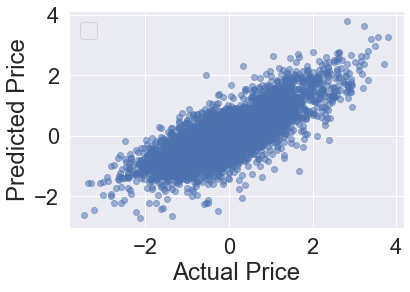

In [146]:
# Investigating Linearity
preds = final_model.predict(X2_test_final)
fig, ax = plt.subplots()

ax.scatter(y2_test, preds, alpha=0.5)
ax.set_xlabel("Actual Price")
ax.set_ylabel("Predicted Price")
ax.legend();

##### We have some outliers that are all over the place, but in general it looks like we have a linear relationship (not violating this assumption)

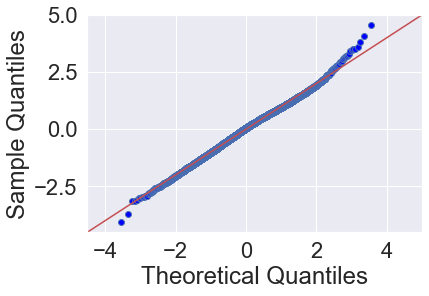

In [147]:
# Investigating Normality QQPlot
import scipy.stats as stats

residuals = (y2_test - preds)
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True);

##### Since almost all of the datapoints fall along a straight line in this QQ-plot, we can consider the normality assumption satisfied

In [148]:
# Investigating Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(X2_train_final.values, i) for i in range(X2_train_final.shape[1])]
pd.Series(vif, index=X2_train_final.columns, name="Variance Inflation Factor")

sqft_living_log      4.303137
sqft_lot_log         1.368904
bedrooms            28.306718
bathrooms           27.008616
floors              14.863076
waterfront           1.015819
grade              121.295582
yr_built           270.868190
3                   72.086166
4                   29.072516
5                    9.478880
Name: Variance Inflation Factor, dtype: float64

In [155]:
print('Multicollinear Features')
display(MC_df)

Multicollinear Features


,Correlations,Features
2,0.737053,"[sqft_living, grade]"
3,0.737053,"[grade, sqft_living]"
0,0.725613,"[bathrooms, sqft_living]"
1,0.725613,"[sqft_living, bathrooms]"


##### Although we still have a couple pairs of highly correlated variables, they each come out well below the acceptable correlation value of 0.75 suggesting that we in fact do not have an issue of high multi-collinearity.

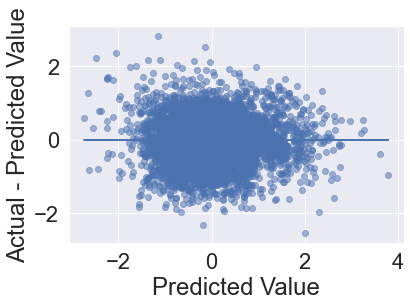

In [149]:
# Investigating Homoscedasticity
fig, ax = plt.subplots()

ax.scatter(preds, residuals, alpha=0.5)
ax.plot(preds, [0 for i in range(len(X2_test))])
ax.set_xlabel("Predicted Value")
ax.set_ylabel("Actual - Predicted Value");

##### The residuals for all predictors have mostly equal variance along the regression line. Our model passes the homoscedasticity test

## Conclusions

Together, square footage, grade and bathrooms are the best predictors of a house's price in King County. Homeowners who are interested in selling their homes at a higher price should focus on expanding square footage and improving the quality of construction. When expanding square footage, homeowners should consider building additional bathrooms, as this analysis suggests that number of bathrooms is positively related to price.

Our best model had an R-squared value of 0.613, telling us that the model fit the data with an accuracy of 61%. The prob(F-statistic) of 0.00 tells us that there is an extremely low probability of achieving these results with the null hypothesis being true, and tells us that our regression is meaningful. Our p-values for our features are well below our alpha or significance level, showing that they are each contributing to the model significantly. With an alpha of 0.05, at a confidence level of 95%, we reject the null hypothesis that there is no relationship between our features and our target variable, price.

The model does have some limitations: given that some of the variables needed to be log-transformed to satisfy regression assumptions, any new data used with the model would have to undergo similar preprocessing. Additionally, given regional differences in housing prices, the model's applicability to data from other counties may be limited. Given that outliers were removed, the model may also not accurately predict extreme values.

A good next step here would be to start trying to figure out why our outliers behave the way they do. Maybe there is some information we could extract from the text features that are currently not part of the model